In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sb

from scipy import stats

sb.set()

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["image.cmap"] = "viridis"

DPI_VALUE = 200

DATA LOADING

In [ ]:
!gdown --id 1sC3FkqslaBsj1CQTNPBlfZwfkhms_fTC
#загружаем файл xlsx с гугл таблиц

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1sC3FkqslaBsj1CQTNPBlfZwfkhms_fTC
To: /content/Книжный АД :D.xlsx
100% 49.8k/49.8k [00:00<00:00, 30.1MB/s]


<h1>DATA READING</h1>

In [ ]:
#main_df = pd.read_csv('/home/data/Книжный АД D.xlsx - Лист1.csv')
xl = pd.ExcelFile('/content/Книжный АД :D.xlsx')
#main_df1 = xl.parse('Лист1')нахрен убрать
main_df2 = xl.parse('Лист2') 
#main_df.head()
#читаем сдесь xlsx файл

In [ ]:
main_df2.shape

(180, 13)

<h2>СТАТИСТИКИ</h2>

In [ ]:
main_df2.describe()

,цена,количество страниц,визуальная привлекательность (1 - 5),качество обложки (1 - 5),качество переплёта (1 - 5),качество бумаги (1 - 5),качество печати (1 - 5),формат книги (0-3),размер книги (0-3),эксперт
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.00000,180.000000
mean,984.766667,412.377778,3.688889,3.944444,3.750000,3.816667,4.094444,1.211111,1.20000,2.500000
std,754.003031,207.399249,1.201902,1.194598,1.218457,0.959952,0.856766,0.804935,0.68829,0.765893
min,148.000000,112.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,1.000000
25%,523.500000,255.000000,3.000000,4.000000,3.000000,3.000000,4.000000,1.000000,1.00000,2.000000
50%,780.000000,383.500000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.00000,3.000000
75%,1212.500000,512.000000,5.000000,5.000000,5.000000,4.250000,5.000000,2.000000,2.00000,3.000000
max,4930.000000,1225.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.00000,3.000000


In [ ]:
some_cols = [
    "цена",
    "количество страниц",
    "визуальная привлекательность (1 - 5)",
    "качество обложки (1 - 5)",
    "качество переплёта (1 - 5)",
    "качество бумаги (1 - 5)",
    "качество печати (1 - 5)",
    "формат книги (0-3)",
    "размер книги (0-3)",
    "эксперт"
]
#main_df1[some_cols].head()
main_df2[some_cols].head()

,цена,количество страниц,визуальная привлекательность (1 - 5),качество обложки (1 - 5),качество переплёта (1 - 5),качество бумаги (1 - 5),качество печати (1 - 5),формат книги (0-3),размер книги (0-3),эксперт
0,579.0,350.0,3.0,4.0,3.0,4.0,4.0,1.0,1.0,1.0
1,579.0,348.0,3.0,3.0,3.0,4.0,4.0,1.0,1.0,1.0
2,1064.0,687.0,5.0,5.0,5.0,5.0,5.0,2.0,2.0,1.0
3,852.0,415.0,4.0,5.0,3.0,4.0,5.0,1.0,1.0,1.0
4,531.0,351.0,3.0,4.0,3.0,4.0,3.0,1.0,1.0,1.0


<h1>SOME VISUAL STATS</h1>

In [ ]:
main_data2 = np.array(main_df2)

<h2>REASSIGNING VALUES</h2>

In [ ]:
main_data2[main_data2 == 'популярные бестселлеры'] = 0.
main_data2[main_data2 == 'научно-популярная литература'] = 1.
main_data2[main_data2 == 'классика'] = 2.

main_data2[main_data2 == 'Читай-город'] = 0.
main_data2[main_data2 == 'Книжный лабиринт'] = 1.
main_data2[main_data2 == 'Молодая гвардия'] = 2.

<h2>DENSITY VISUALISATION</h2>

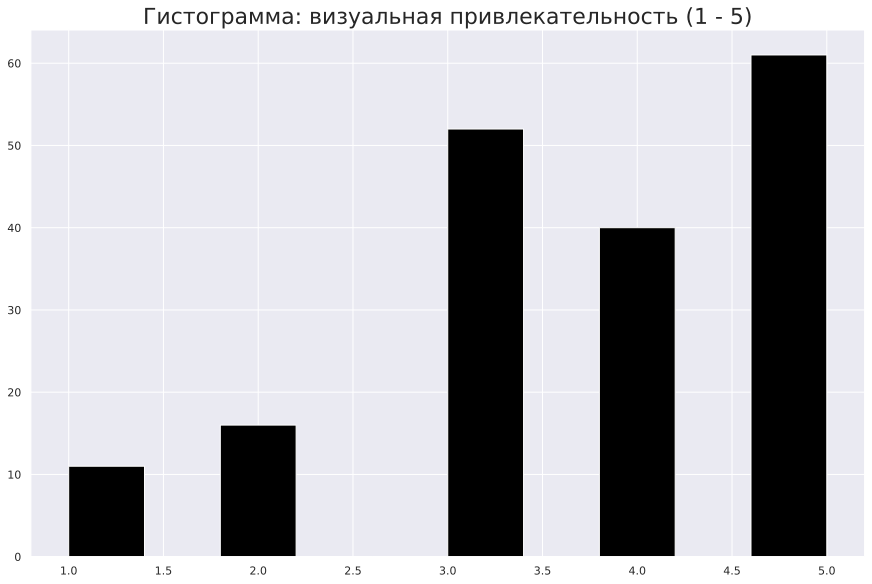

In [ ]:
columns = ['качество обложки (1 - 5)',
       'качество переплёта (1 - 5)', 'качество бумаги (1 - 5)',
       'качество печати (1 - 5)', 'формат книги (0-3)', 'размер книги (0-3)']

fig, ax = plt.subplots(1, 1, figsize=(12, 8), constrained_layout=True)

#sb.distplot(main_data[:, i], ax=ax[int(i>4), i%5], kde=False)
ax.hist(main_df2["визуальная привлекательность (1 - 5)"], color='black')
ax.set_title("Гистограмма: визуальная привлекательность (1 - 5)", fontsize=22)

plt.savefig('визуальная привлекательность.png', bbox_inches='tight', dpi=DPI_VALUE)

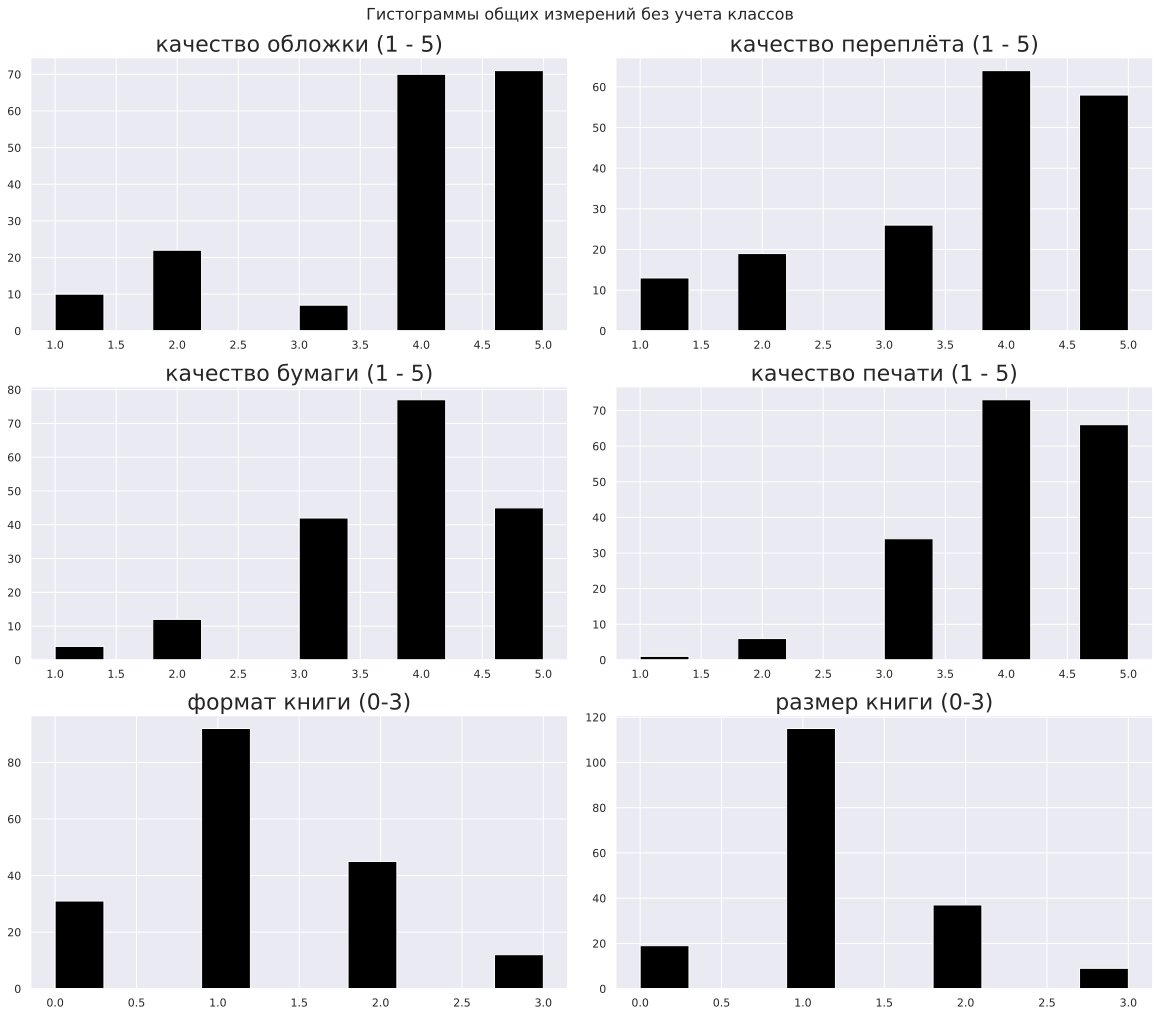

In [ ]:
columns = ['качество обложки (1 - 5)',
       'качество переплёта (1 - 5)', 'качество бумаги (1 - 5)',
       'качество печати (1 - 5)', 'формат книги (0-3)', 'размер книги (0-3)']

fig, ax = plt.subplots(3, 2, figsize=(16, 14), constrained_layout=True)

counter = 0

for i in range(3):
    for j in range(2):
        #sb.distplot(main_data[:, i], ax=ax[int(i>4), i%5], kde=False)
        ax[i, j].hist(main_df2[columns[counter]], color='black')
        ax[i, j].set_title(columns[counter], fontsize=22)
        counter += 1

fig.suptitle('Гистограммы общих измерений без учета классов', fontsize=16)

plt.savefig('разное.png', bbox_inches='tight', dpi=DPI_VALUE)

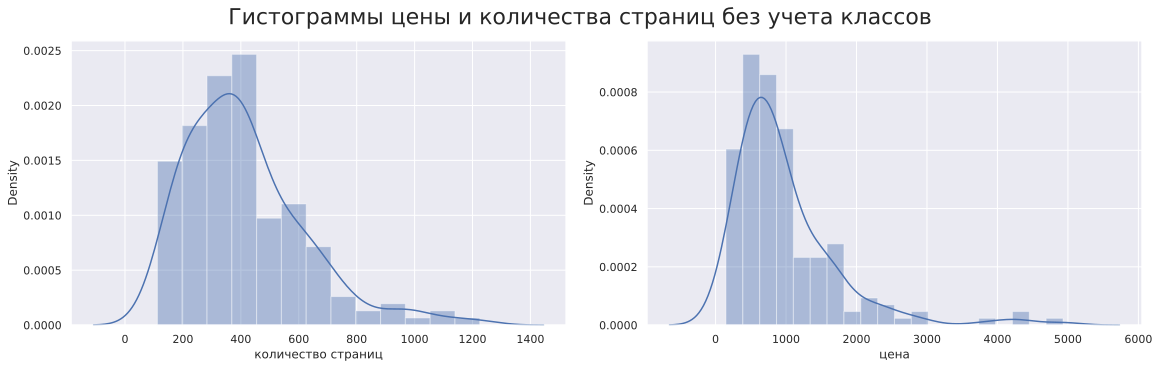

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5), constrained_layout=True)

for i, name in enumerate(['количество страниц', 'цена']):
    sb.distplot(main_df2[name], ax=ax[i])
fig.suptitle('Гистограммы цены и количества страниц без учета классов', fontsize=22)


plt.savefig('цена_и_колво_страниц.png', bbox_inches='tight', dpi=DPI_VALUE)

<h1>ДАЛЕЕ ГРУППИРОВКА</h1>

In [ ]:
from scipy.stats import norm, expon, uniform

<h1>ШАБЛОННАЯ ФУНКЦИЯ ДЛЯ ОБРАБОТКИ БЛОКОВ. НИЖЕ ПРИМЕРЫ</h1>

In [ ]:
def template_block_structure_first(df, name, categories, needed_cols, color='b', kde=True, figsize=(27, 15)):
    fig, ax = plt.subplots(len(needed_cols), len(categories), figsize=figsize, constrained_layout=True)
    for i, col in enumerate(needed_cols):
        for j, category in enumerate(categories):
            handled_df = df[df[name] == category]
            sb.distplot(handled_df[col], ax=ax[i, j], color=color, kde=kde)
            ax[i, j].set_title(category, fontsize=22)

In [ ]:
def template_block_structure_second(df, name, categories, needed_cols, color='b'):
    for i, col in enumerate(needed_cols):
        fig, ax = plt.subplots(1, len(categories), figsize=(35, 12), constrained_layout=True)
        for j, category in enumerate(categories):
            handled_df = df[df[name] == category]
            sb.histplot(handled_df[col], color=color, kde=False, stat="density", ax=ax[j])
            ax[j].set_title(category, linewidths=2)

<h3>ПЛОТНОСТИ ЦЕНЫ И КОЛИЧЕСТВА СТРАНИЦ В ЗАВИСИМОСТИ ОТ КАТЕГОРИИ</h3>

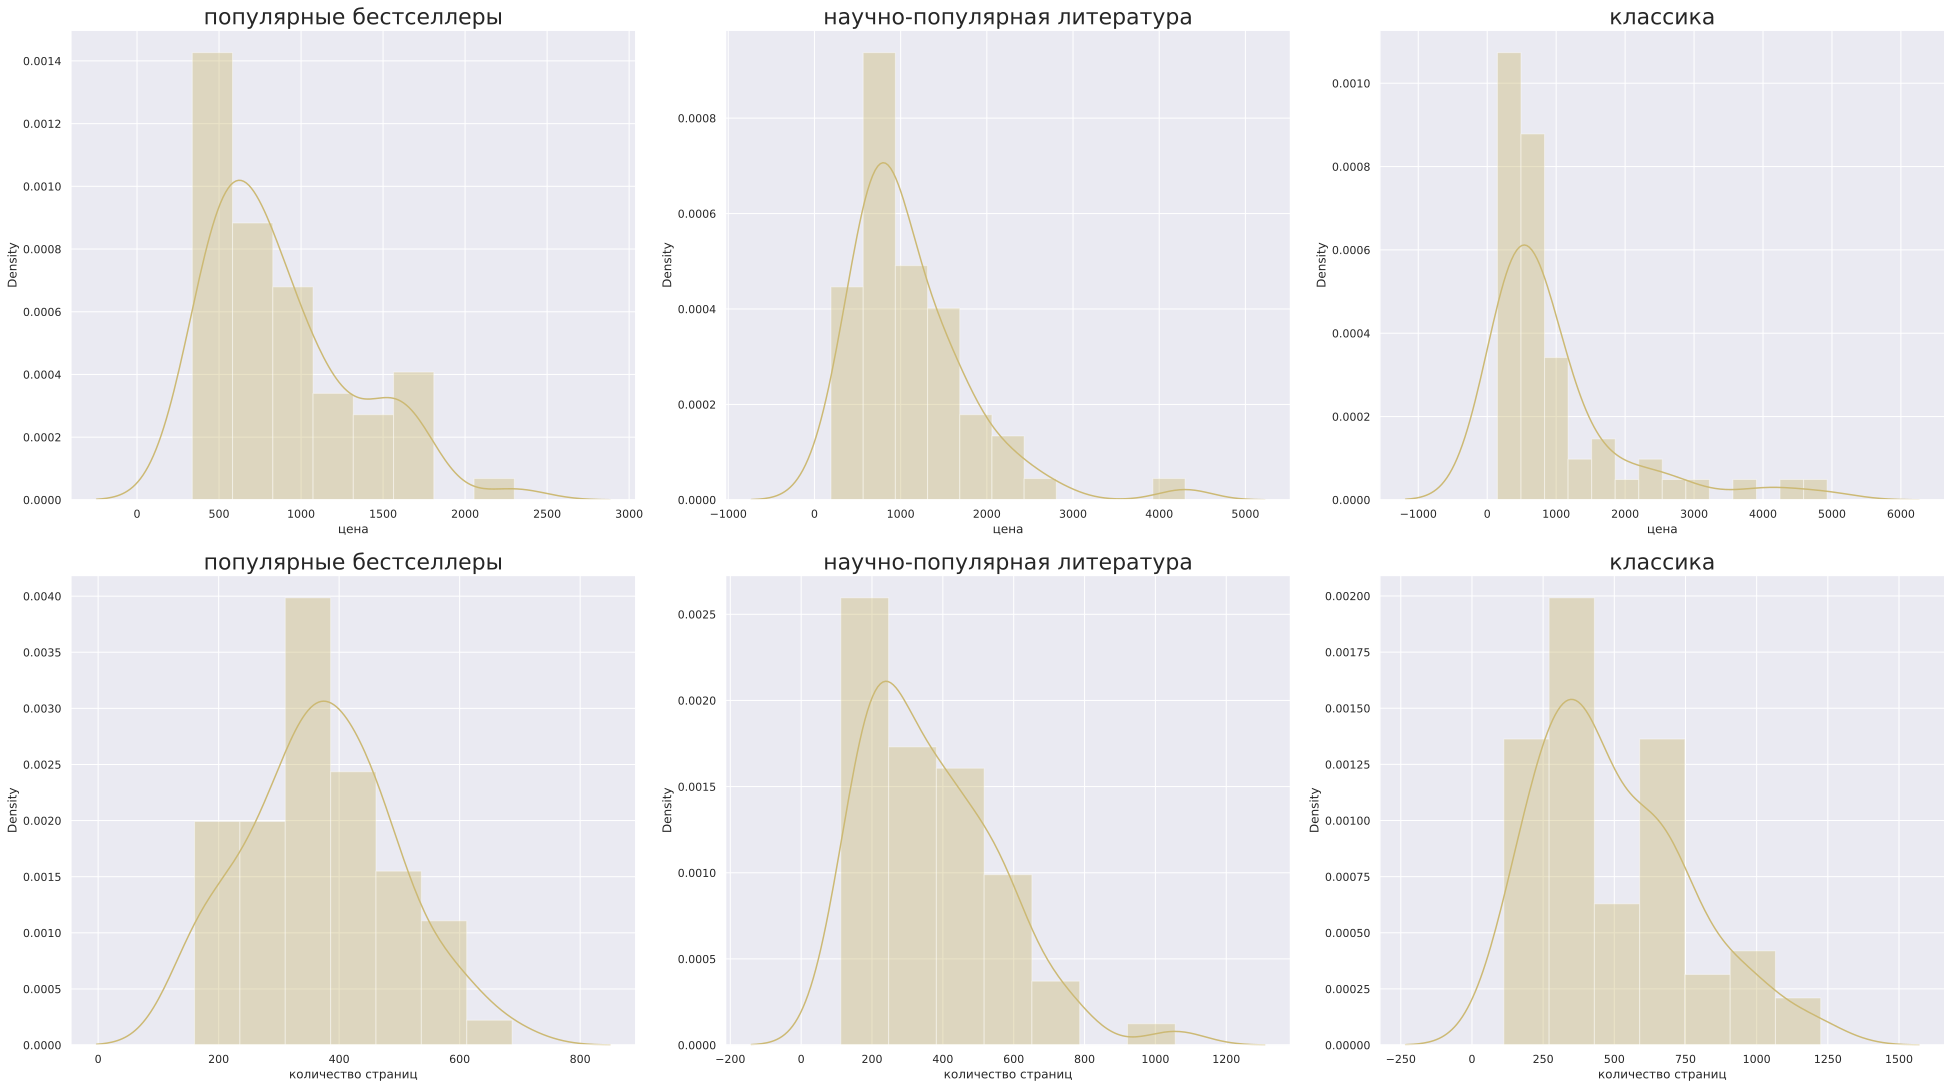

In [ ]:
name = 'категория книг'

categories = ['популярные бестселлеры', 'научно-популярная литература', 'классика']

needed_cols = ['цена', 'количество страниц']

template_block_structure_first(main_df2, name, categories, needed_cols, 'y', True)
plt.savefig('цена_по_категориям_1', bbox_inches='tight', dpi=DPI_VALUE)

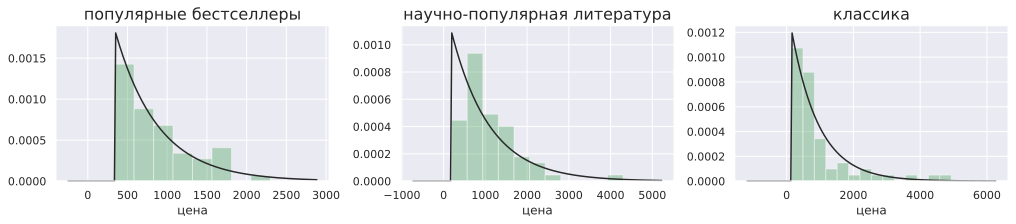

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14, 3), constrained_layout=True)

col = 'цена'

handled_df = main_df2[main_df2['категория книг'] == 'популярные бестселлеры']
sb.distplot(handled_df[col], color='g', fit=expon, kde=False, ax=ax[0])
ax[0].set_title('популярные бестселлеры', fontsize=16)

handled_df = main_df2[main_df2['категория книг'] == 'научно-популярная литература']
sb.distplot(handled_df[col], color='g', fit=expon, kde=False, ax=ax[1])
ax[1].set_title('научно-популярная литература', fontsize=16)

handled_df = main_df2[main_df2['категория книг'] == 'классика']
sb.distplot(handled_df[col], color='g', fit=expon, kde=False, ax=ax[2])
ax[2].set_title('классика', fontsize=16)

plt.savefig('цена_по_категориям_2', bbox_inches='tight', dpi=DPI_VALUE)

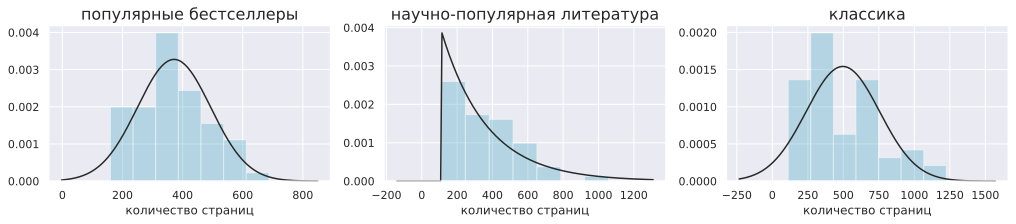

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14, 3), constrained_layout=True)

col = 'количество страниц'

handled_df = main_df2[main_df2['категория книг'] == 'популярные бестселлеры']
sb.distplot(handled_df[col], color='c', fit=norm, kde=False, ax=ax[0])
ax[0].set_title('популярные бестселлеры', fontsize=16)

handled_df = main_df2[main_df2['категория книг'] == 'научно-популярная литература']
sb.distplot(handled_df[col], color='c', fit=expon, kde=False, ax=ax[1])
ax[1].set_title('научно-популярная литература', fontsize=16)

handled_df = main_df2[main_df2['категория книг'] == 'классика']
sb.distplot(handled_df[col], color='c', fit=norm, kde=False, ax=ax[2])
ax[2].set_title('классика', fontsize=16)


plt.savefig('количество_страниц_по_категориям_2', bbox_inches='tight', dpi=DPI_VALUE)

<h3>ПЛОТНОСТИ ЦЕНЫ И КОЛИЧЕСТВА СТРАНИЦ В ЗАВИСИМОСТИ ОТ МАГАЗИНА</h3>

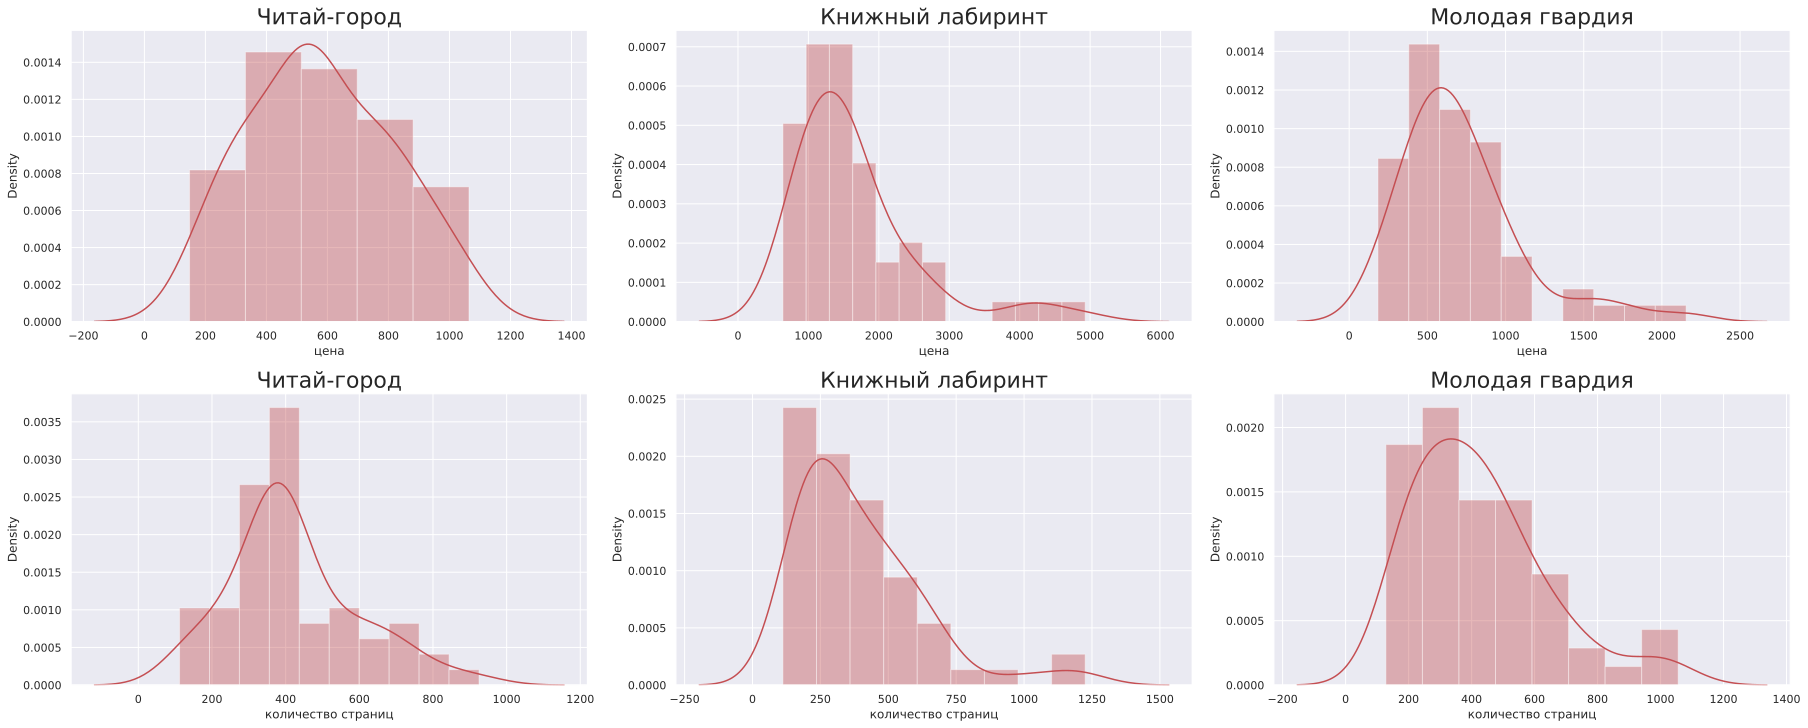

In [ ]:
name = 'Магазин'

categories = ['Читай-город', 'Книжный лабиринт', 'Молодая гвардия']

needed_cols = ['цена', 'количество страниц']

template_block_structure_first(main_df2, name, categories, needed_cols, 'r', figsize=(25, 10))

plt.savefig('цена_по_магазинам_1', bbox_inches='tight', dpi=DPI_VALUE)

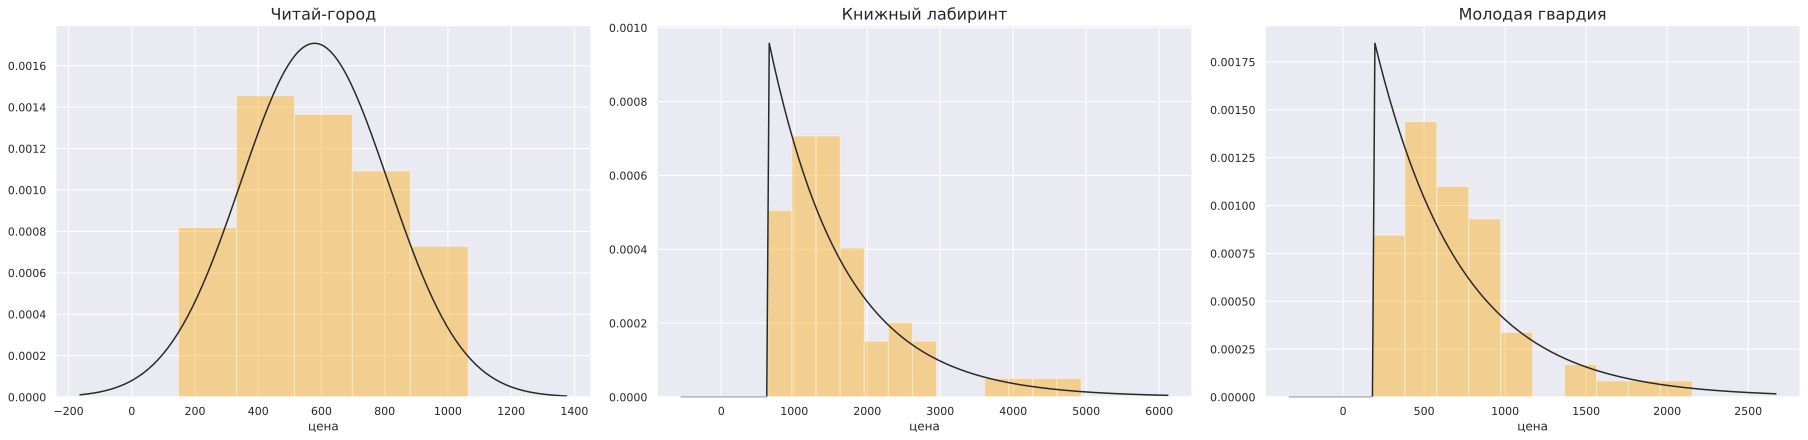

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(25, 6), constrained_layout=True)

col = 'цена'

handled_df = main_df2[main_df2['Магазин'] == 'Читай-город']
sb.distplot(handled_df[col], color='orange', fit=norm, kde=False, ax=ax[0])
ax[0].set_title('Читай-город', fontsize=16)

handled_df = main_df2[main_df2['Магазин'] == 'Книжный лабиринт']
sb.distplot(handled_df[col], color='orange', fit=expon, kde=False, ax=ax[1])
ax[1].set_title('Книжный лабиринт', fontsize=16)

handled_df = main_df2[main_df2['Магазин'] == 'Молодая гвардия']
sb.distplot(handled_df[col], color='orange', fit=expon, kde=False, ax=ax[2])
ax[2].set_title('Молодая гвардия', fontsize=16)

plt.savefig('цена_по_магазинам_2', bbox_inches='tight', dpi=DPI_VALUE)

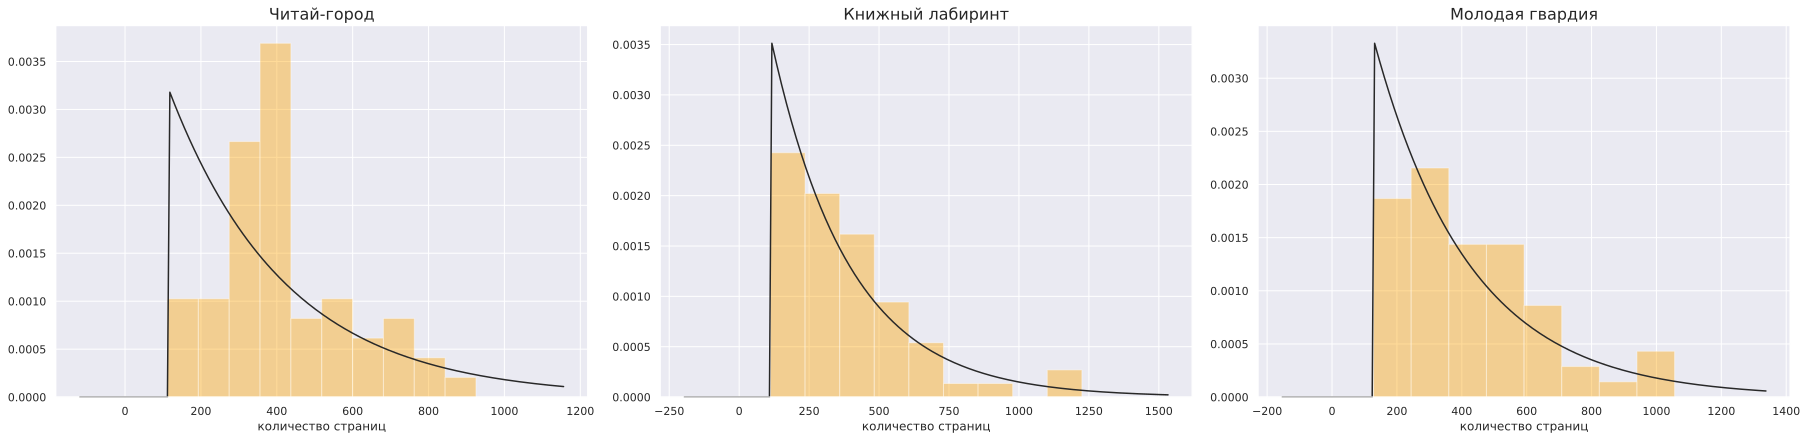

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(25, 6), constrained_layout=True)

col = 'количество страниц'

handled_df = main_df2[main_df2['Магазин'] == 'Читай-город']
sb.distplot(handled_df[col], color='orange', fit=expon, kde=False, ax=ax[0])
ax[0].set_title('Читай-город', fontsize=16)

handled_df = main_df2[main_df2['Магазин'] == 'Книжный лабиринт']
sb.distplot(handled_df[col], color='orange', fit=expon, kde=False, ax=ax[1])
ax[1].set_title('Книжный лабиринт', fontsize=16)

handled_df = main_df2[main_df2['Магазин'] == 'Молодая гвардия']
sb.distplot(handled_df[col], color='orange', fit=expon, kde=False, ax=ax[2])
ax[2].set_title('Молодая гвардия', fontsize=16)

plt.savefig('количество_страниц_2', bbox_inches='tight', dpi=DPI_VALUE)

<h1>ADDITIONAL</h1>

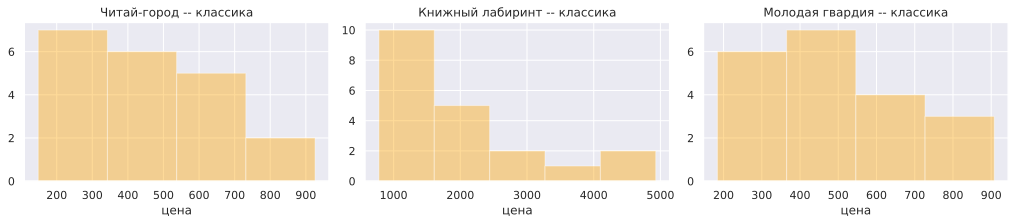

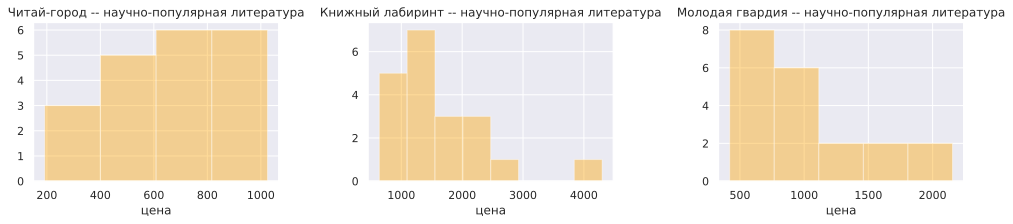

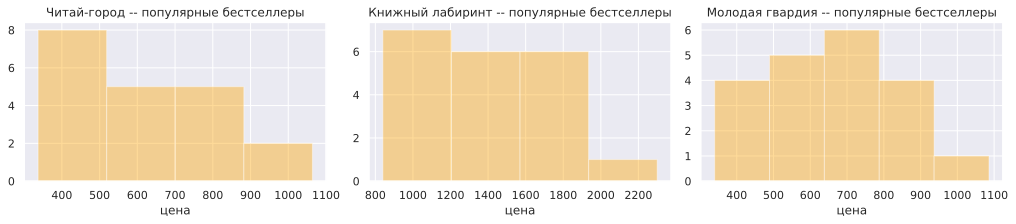

In [ ]:
column = 'цена'


sb.set(font_scale=1) # font size 2

for col in ['классика', 'научно-популярная литература', 'популярные бестселлеры']:
    fig, ax = plt.subplots(1, 3, figsize=(14, 3), constrained_layout=True)

    handled_df = main_df2[(main_df2['Магазин'] == 'Читай-город') & (main_df2['категория книг'] == col)]
    sb.distplot(handled_df[column], color='orange',  kde=False, ax=ax[0])
    ax[0].set_title(f'Читай-город -- {col}')

    handled_df = main_df2[(main_df2['Магазин'] == 'Книжный лабиринт') & (main_df2['категория книг'] == col)]
    sb.distplot(handled_df[column], color='orange',  kde=False, ax=ax[1])
    ax[1].set_title(f'Книжный лабиринт -- {col}')

    handled_df = main_df2[(main_df2['Магазин'] == 'Молодая гвардия') & (main_df2['категория книг'] == col)]
    sb.distplot(handled_df[column], color='orange',  kde=False, ax=ax[2])
    ax[2].set_title(f'Молодая гвардия -- {col}')

    plt.savefig(f"{col}_однородность_цена", bbox_inches='tight', dpi=DPI_VALUE)

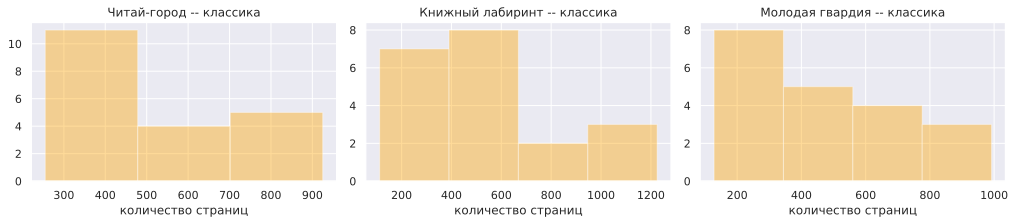

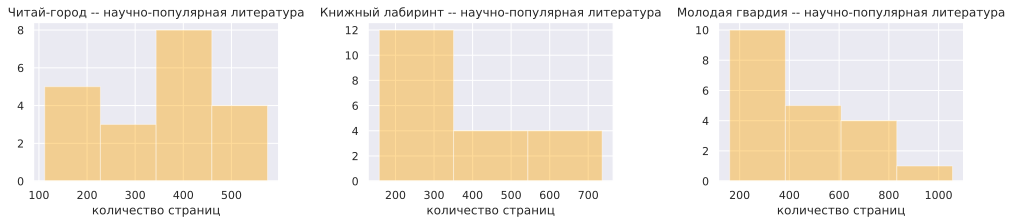

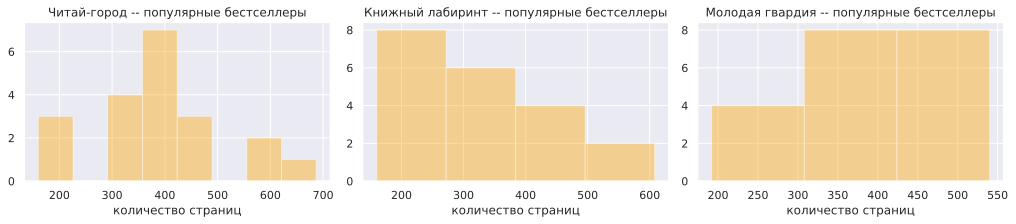

In [ ]:
column = 'количество страниц'


sb.set(font_scale=1) # font size 2

for col in ['классика', 'научно-популярная литература', 'популярные бестселлеры']:
    fig, ax = plt.subplots(1, 3, figsize=(14, 3), constrained_layout=True)

    handled_df = main_df2[(main_df2['Магазин'] == 'Читай-город') & (main_df2['категория книг'] == col)]
    sb.distplot(handled_df[column], color='orange',  kde=False, ax=ax[0])
    ax[0].set_title(f'Читай-город -- {col}')

    handled_df = main_df2[(main_df2['Магазин'] == 'Книжный лабиринт') & (main_df2['категория книг'] == col)]
    sb.distplot(handled_df[column], color='orange',  kde=False, ax=ax[1])
    ax[1].set_title(f'Книжный лабиринт -- {col}')

    handled_df = main_df2[(main_df2['Магазин'] == 'Молодая гвардия') & (main_df2['категория книг'] == col)]
    sb.distplot(handled_df[column], color='orange',  kde=False, ax=ax[2])
    ax[2].set_title(f'Молодая гвардия -- {col}')

    plt.savefig(f"{col}_однородность_колво_страниц", bbox_inches='tight', dpi=DPI_VALUE)

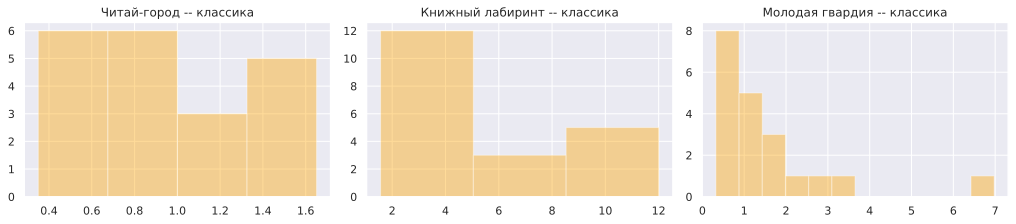

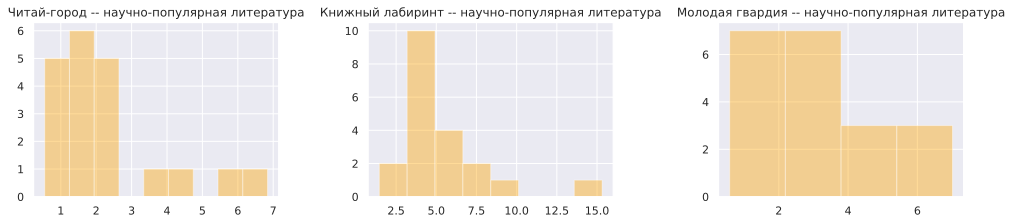

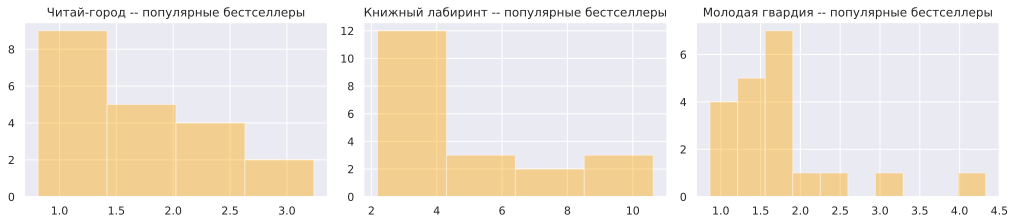

In [ ]:
column0 = 'цена'
column1 = 'количество страниц'

sb.set(font_scale=1) # font size 2

for col in ['классика', 'научно-популярная литература', 'популярные бестселлеры']:
    fig, ax = plt.subplots(1, 3, figsize=(14, 3), constrained_layout=True)

    handled_df = main_df2[(main_df2['Магазин'] == 'Читай-город') & (main_df2['категория книг'] == col)]
    sb.distplot(handled_df[column0]/handled_df[column1], color='orange',  kde=False, ax=ax[0])
    ax[0].set_title(f'Читай-город -- {col}')

    handled_df = main_df2[(main_df2['Магазин'] == 'Книжный лабиринт') & (main_df2['категория книг'] == col)]
    sb.distplot(handled_df[column0]/handled_df[column1], color='orange',  kde=False, ax=ax[1])
    ax[1].set_title(f'Книжный лабиринт -- {col}')

    handled_df = main_df2[(main_df2['Магазин'] == 'Молодая гвардия') & (main_df2['категория книг'] == col)]
    sb.distplot(handled_df[column0]/handled_df[column1], color='orange',  kde=False, ax=ax[2])
    ax[2].set_title(f'Молодая гвардия -- {col}')

    plt.savefig(f"{col}_однородность_цена_на_колво_страниц", bbox_inches='tight', dpi=DPI_VALUE)

<h1>SOME CRITERIA</h1>

<h1>1) Рассмотреть распределение цен по каждому блоку, будет ли оно похоже на нормальное? Экспоненциальное?</h1>

<h3>ПО ЖАНРАМ</h3>

In [ ]:
category = ['популярные бестселлеры', 'научно-популярная литература', 'классика']

for cat in category:
    data = main_df2[main_df2['категория книг'] == cat]['цена']

    print(stats.anderson(data, 'expon'))

AndersonResult(statistic=7.878628691442046, critical_values=array([0.913, 1.067, 1.328, 1.59 , 1.938]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=5.903412976964987, critical_values=array([0.913, 1.067, 1.328, 1.59 , 1.938]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=2.0628528047518913, critical_values=array([0.913, 1.067, 1.328, 1.59 , 1.938]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [ ]:
category = ['популярные бестселлеры', 'научно-популярная литература', 'классика']

data = main_df2[main_df2['категория книг'] == cat]['цена']

print(stats.anderson(data, 'expon'))

AndersonResult(statistic=2.0628528047518913, critical_values=array([0.913, 1.067, 1.328, 1.59 , 1.938]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [ ]:
data = main_df2[main_df2['категория книг'] == 'популярные бестселлеры']['количество страниц']

print(stats.anderson(data, 'norm'))

data = main_df2[main_df2['категория книг'] == 'научно-популярная литература']['количество страниц']

print(stats.anderson(data, 'expon'))


AndersonResult(statistic=0.28356505774731033, critical_values=array([0.544, 0.619, 0.743, 0.866, 1.03 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=7.115406219917034, critical_values=array([0.913, 1.067, 1.328, 1.59 , 1.938]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


<h3>ПО МАГАЗИНАМ</h3>

In [ ]:
category = ['Читай-город', 'Книжный лабиринт', 'Молодая гвардия']

for cat in category:
    data = main_df2[main_df2['Магазин'] == cat]['цена']

    print('Expon', stats.anderson(data, 'expon'))

Expon AndersonResult(statistic=9.301170323596537, critical_values=array([0.913, 1.067, 1.328, 1.59 , 1.938]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Expon AndersonResult(statistic=9.004572507933105, critical_values=array([0.913, 1.067, 1.328, 1.59 , 1.938]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Expon AndersonResult(statistic=7.4667759895297365, critical_values=array([0.913, 1.067, 1.328, 1.59 , 1.938]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [ ]:
data = main_df2[main_df2['Магазин'] == 'Читай-город']['цена']

print('Norm', stats.anderson(data, 'norm'))
print('Norm', stats.shapiro(data))

Norm AndersonResult(statistic=0.3586966411255119, critical_values=array([0.544, 0.619, 0.743, 0.866, 1.03 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Norm ShapiroResult(statistic=0.9757048487663269, pvalue=0.2744407057762146)


In [ ]:
category = ['Читай-город', 'Книжный лабиринт', 'Молодая гвардия']

for cat in category:
    data = main_df2[main_df2['Магазин'] == cat]['количество страниц']

    print('Expon', stats.anderson(data, 'expon'))

Expon AndersonResult(statistic=10.169525289184804, critical_values=array([0.913, 1.067, 1.328, 1.59 , 1.938]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Expon AndersonResult(statistic=6.351855648434494, critical_values=array([0.913, 1.067, 1.328, 1.59 , 1.938]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Expon AndersonResult(statistic=7.706267562281411, critical_values=array([0.913, 1.067, 1.328, 1.59 , 1.938]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [ ]:
category = ['популярные бестселлеры', 'научно-популярная литература', 'классика']

for cat in category:
    data = main_df2[main_df2['категория книг'] == cat]['количество страниц']

    print('Norm', stats.anderson(data, 'norm'))
    print('Norm', stats.shapiro(data))

Norm AndersonResult(statistic=0.28356505774731033, critical_values=array([0.544, 0.619, 0.743, 0.866, 1.03 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Norm ShapiroResult(statistic=0.978938102722168, pvalue=0.3852917551994324)
Norm AndersonResult(statistic=1.1852562484338733, critical_values=array([0.544, 0.619, 0.743, 0.866, 1.03 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Norm ShapiroResult(statistic=0.9185831546783447, pvalue=0.0006728442967869341)
Norm AndersonResult(statistic=1.1002655715444476, critical_values=array([0.544, 0.619, 0.743, 0.866, 1.03 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Norm ShapiroResult(statistic=0.9405730962753296, pvalue=0.005744929891079664)


In [ ]:
category = ['Читай-город', 'Книжный лабиринт', 'Молодая гвардия']

for cat in category:
    data = main_df2[main_df2['Магазин'] == cat]['количество страниц']

    print('Norn', stats.anderson(data, 'norm'))
    print('Norn', stats.shapiro(data))

Norn AndersonResult(statistic=1.28569395190177, critical_values=array([0.544, 0.619, 0.743, 0.866, 1.03 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Norn ShapiroResult(statistic=0.9476977586746216, pvalue=0.01215583086013794)
Norn AndersonResult(statistic=2.1408983415802396, critical_values=array([0.544, 0.619, 0.743, 0.866, 1.03 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Norn ShapiroResult(statistic=0.8556185364723206, pvalue=4.47979937234777e-06)
Norn AndersonResult(statistic=1.2291972886268354, critical_values=array([0.544, 0.619, 0.743, 0.866, 1.03 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Norn ShapiroResult(statistic=0.9185219407081604, pvalue=0.0006690665031783283)


<h1>3) Зависит ли цена от толщины? От яркости обложки?</h1>

<h1>CORRELATION</h1>

In [ ]:
!pip install pingouin --quiet

<h1>ЕСЛИ НЕ ЗАПУСКАЕТСЯ ЭТА СРАНЬ, ТО Runtime>Restart and Run All

In [ ]:
main_df2.columns.shape

(13,)

In [ ]:
import pingouin as pg

data = np.delete(main_data2, 1, axis=1).astype('float64')

In [ ]:
df2 = pd.DataFrame(data)

<h3>PARTIAL CORRELATION</h3>

In [ ]:
main_df2.columns[9 + 1], main_df2.columns[10 + 1]

('формат книги (0-3)', 'размер книги (0-3)')

In [ ]:
main_df2.columns[5 + 1], main_df2.columns[6 + 1]

('качество обложки (1 - 5)', 'качество переплёта (1 - 5)')

In [ ]:
main_df2.columns[2 + 1], main_df2.columns[5 + 1]

('цена', 'качество обложки (1 - 5)')

In [ ]:
main_df2.columns[3 + 1], main_df2.columns[8 + 1]

('количество страниц', 'качество печати (1 - 5)')

In [ ]:
cols = ['категория книг', 'Магазин', 'цена', 'количество страниц',
       'визуальная привлекательность (1 - 5)', 'качество обложки (1 - 5)',
       'качество переплёта (1 - 5)', 'качество бумаги (1 - 5)',
       'качество печати (1 - 5)', 'формат книги (0-3)', 'размер книги (0-3)',
       'эксперт']

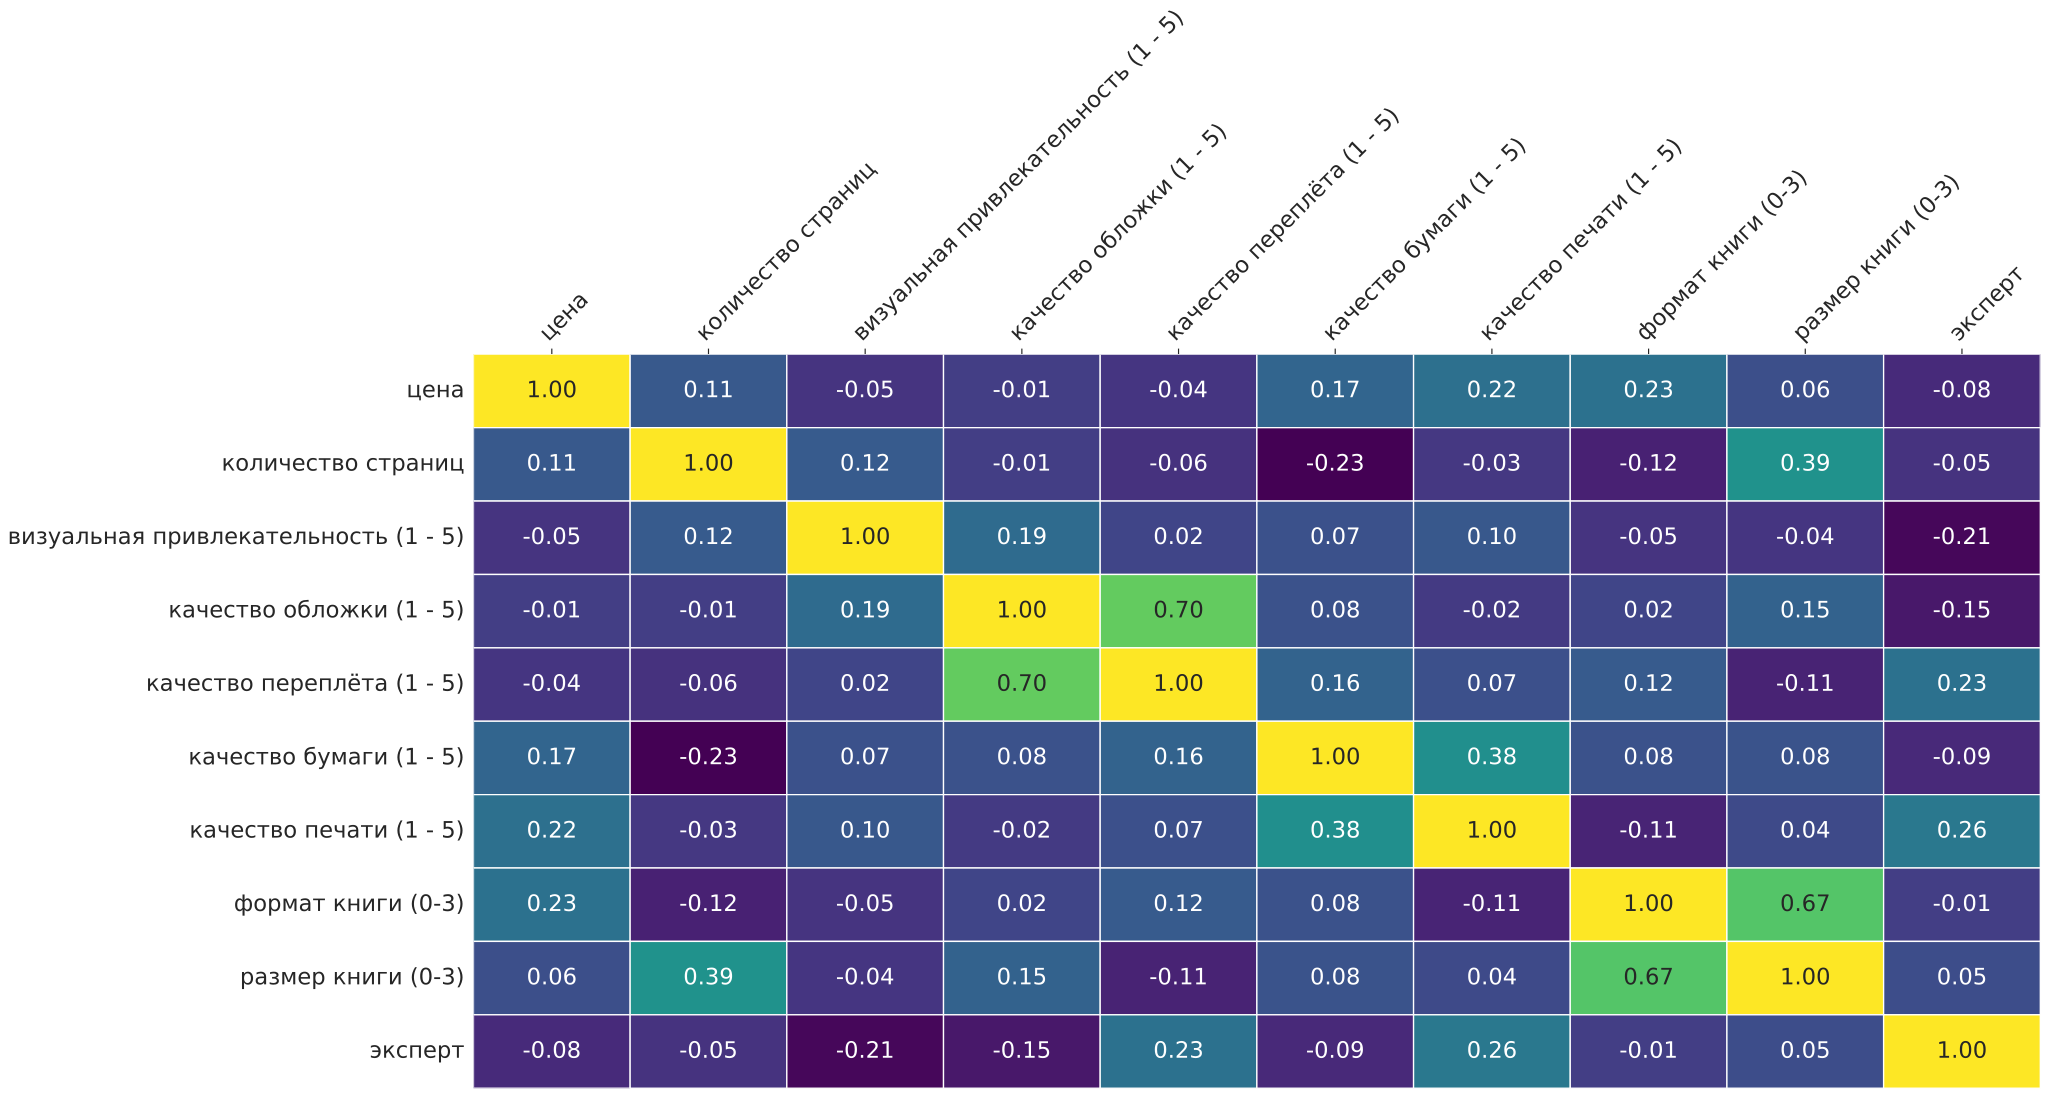

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(30, 16), constrained_layout=True)

sb.set(font_scale=2) # font size 2

ax.xaxis.tick_top()
ax.tick_params(axis = 'y', which = 'major', labelsize = 24)
ax.tick_params(axis = 'y', which = 'minor', labelsize = 24)
sb.heatmap(main_df2[cols].pcorr(), annot=True, fmt=".2f", cmap='viridis', cbar=False, ax=ax, xticklabels='auto', yticklabels='auto', linewidths=1.4)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, size = 24, ha="left", rotation_mode='anchor')

plt.savefig('частные_корреляции_1', bbox_inches='tight', dpi=DPI_VALUE)

<h3>CORRELATION</h3>

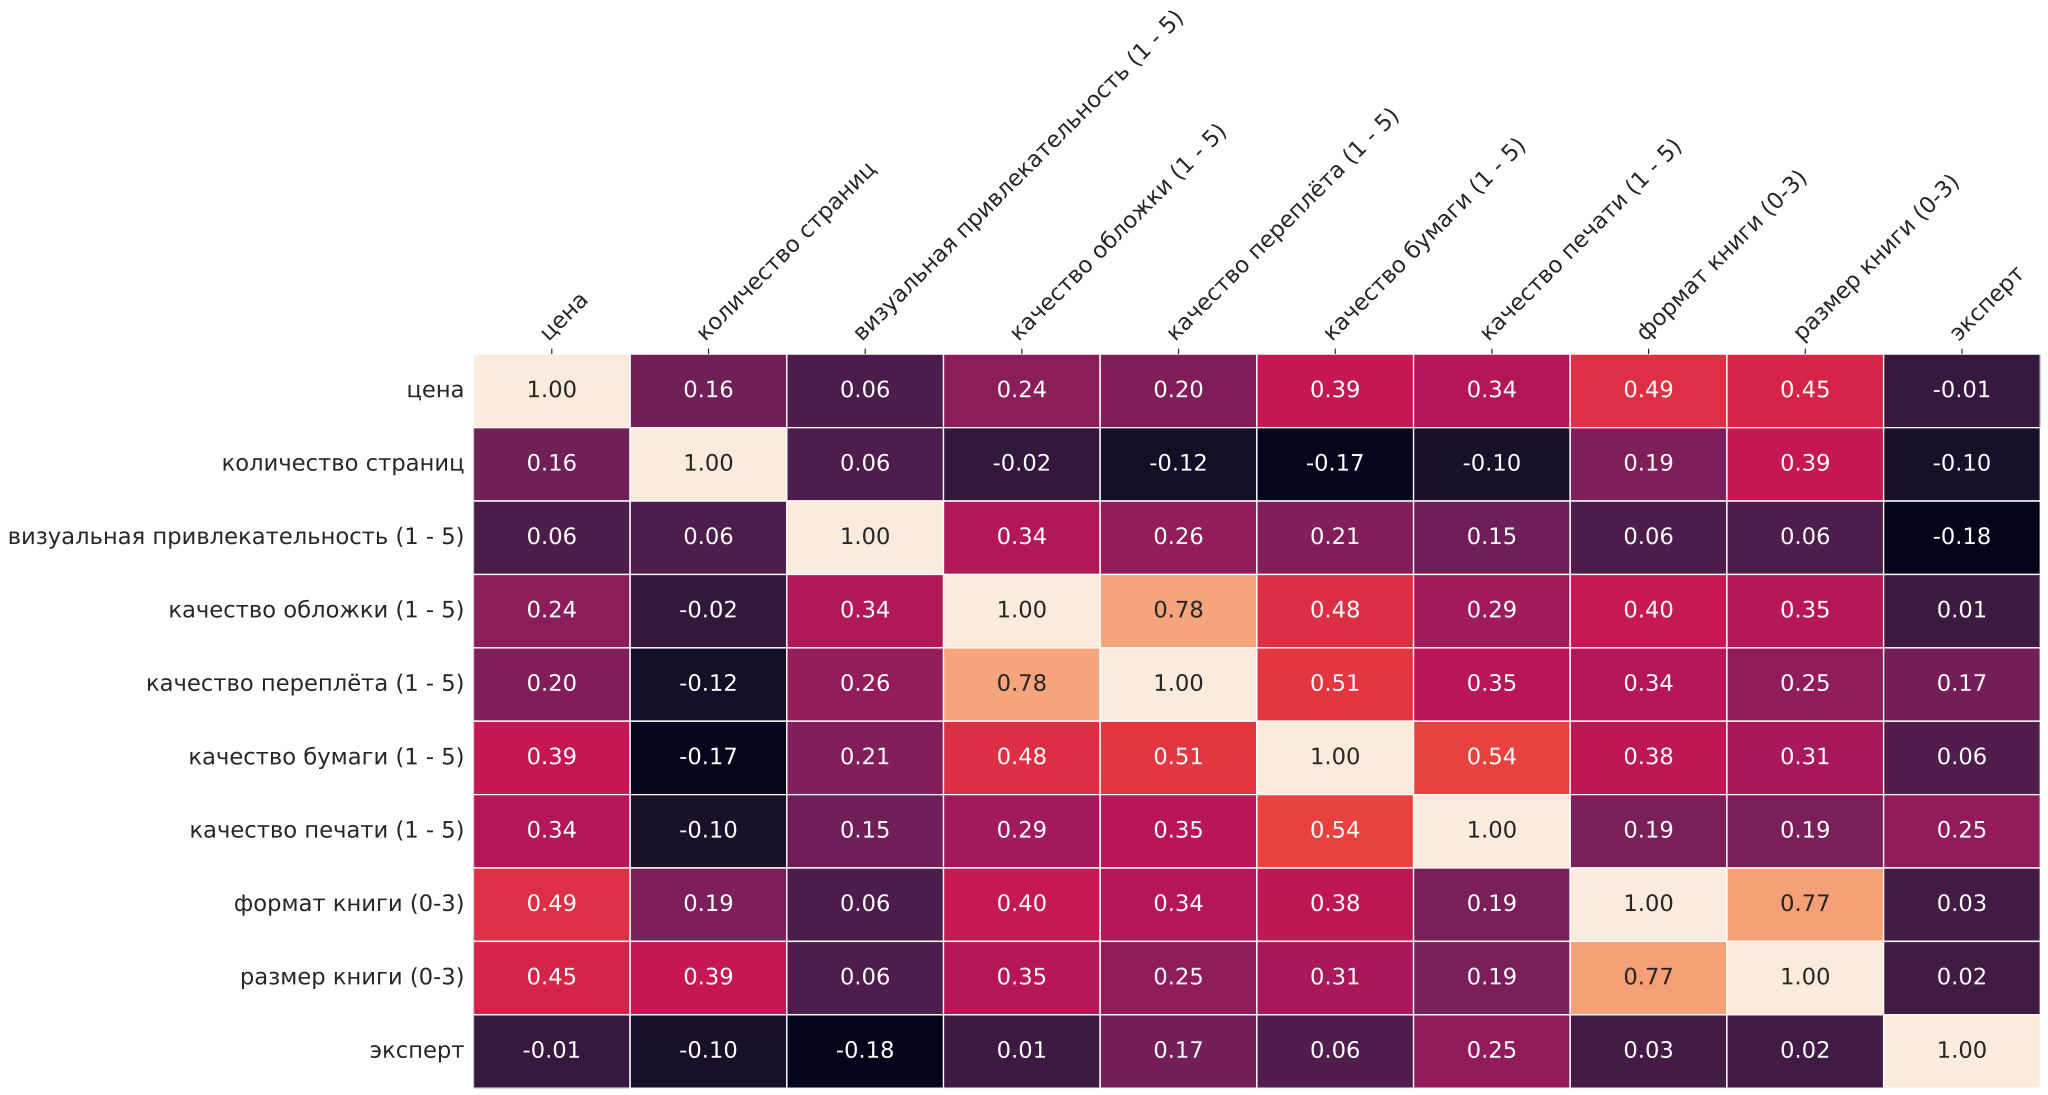

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(30, 16), constrained_layout=True)

ax.xaxis.tick_top()
ax.tick_params(axis = 'y', which = 'major', labelsize = 24)
ax.tick_params(axis = 'y', which = 'minor', labelsize = 24)
sb.heatmap(main_df2[cols].corr(), annot=True, fmt=".2f", cbar=False, ax=ax, xticklabels='auto', yticklabels='auto', linewidths=1.4)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, size = 24, ha="left", rotation_mode='anchor')

plt.savefig('корреляции_1', bbox_inches='tight', dpi=DPI_VALUE)

<h1>2) Однородны ли а) величины "цена/страницу" б) векторы "цена", "страница" между различными типами. Между различными магазинами?</h1>

In [ ]:
!pip install hyppo --quiet

In [ ]:
import hyppo

In [ ]:
main_data2.shape, data.shape

((180, 13), (180, 12))

In [ ]:
cols = ['категория книг', 'Магазин', 'цена', 'количество страниц',
       'визуальная привлекательность (1 - 5)', 'качество обложки (1 - 5)',
       'качество переплёта (1 - 5)', 'качество бумаги (1 - 5)',
       'качество печати (1 - 5)', 'формат книги (0-3)', 'размер книги (0-3)',
       'эксперт']

In [ ]:
#цена на страницу
data0 = data[:, cols.index('цена')] / data[:, cols.index('количество страниц')]
data0.shape

(180,)

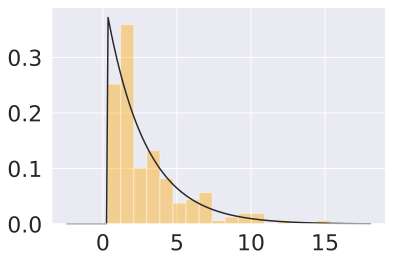

In [ ]:
sb.distplot(data0, color='orange', fit=expon, kde=False)

In [ ]:
def tester(data0, data1, method='Hsic', end='\n'):
    print(hyppo.ksample.KSample(method).test(data0, data1), end=end)
    #print(stats.anderson_ksamp((data0, data1)), end=end)
    print(stats.ks_2samp(data0, data1), end=end)

In [ ]:
def get_data00(category, cat):
    return np.array(main_df2[main_df2[category] == cat]['цена'] / np.array(main_df2[main_df2[category] == cat]['количество страниц']))

In [ ]:
def get_data01(category, cat):
    return np.array(main_df2[main_df2[category] == cat]['цена'])

In [ ]:
def get_data02(category, cat):
    return np.array(np.array(main_df2[main_df2[category] == cat]['количество страниц']))

In [ ]:
categories = ['Читай-город', 'Книжный лабиринт', 'Молодая гвардия']
category = 'Магазин'
cat = 'Читай-город'; col = 'цен'
data0 = get_data00(category, categories[0])
data1 = get_data00(category, categories[1])
data2 = get_data00(category, categories[2])
#indep_test ("CCA", "Dcorr", "HHG", "RV", "Hsic", "MGC", "KMERF", or list) 
method = 'HHG'
print(data0.shape, data1.shape, data2.shape)

tester(data0, data1, method)
print()
tester(data0, data2, method)
print()
tester(data1, data2, method)

(60,) (60,) (60,)
IndependenceTestOutput(stat=153598.49168375757, pvalue=0.000999000999000999)
KstestResult(statistic=0.7333333333333333, pvalue=6.426349429505847e-16)

IndependenceTestOutput(stat=10903.295071549204, pvalue=0.12487512487512488)
KstestResult(statistic=0.18333333333333332, pvalue=0.2671202776187836)

IndependenceTestOutput(stat=99179.06918699792, pvalue=0.000999000999000999)
KstestResult(statistic=0.5666666666666667, pvalue=3.1578017116651398e-09)


In [ ]:
def get_data10(category0, cat0, category1, cat1):
    return np.array(main_df2[(main_df2[category0] == cat0) & (main_df2[category1] == cat1)]['цена'] /
                    main_df2[(main_df2[category0] == cat0) & (main_df2[category1] == cat1)]['количество страниц'])

In [ ]:
def get_data11(category0, cat0, category1, cat1):
    return np.array(main_df2[(main_df2[category0] == cat0) & (main_df2[category1] == cat1)]['цена'])

In [ ]:
def get_data12(category0, cat0, category1, cat1):
    return np.array(main_df2[(main_df2[category0] == cat0) & (main_df2[category1] == cat1)]['количество страниц'])

In [ ]:
np.array(main_df2[(main_df2['Магазин'] == 'Читай-город') & (main_df2['категория книг'] == 'классика')]['цена'])

array([815., 256., 926., 722., 259., 245., 421., 338., 350., 580., 350.,
       613., 368., 316., 473., 553., 524., 148., 592., 215.])

In [ ]:
categories0 = ['Читай-город', 'Книжный лабиринт', 'Молодая гвардия']
categories1 = ['популярные бестселлеры', 'научно-популярная литература', 'классика']

category0 = 'Магазин'
category1 = 'категория книг'
method = 'HHG'

for i in range(len(categories0)):
    for j in range(i + 1, len(categories0)):
        print(f"Однородность {categories0[i]} и {categories0[j]} на категориях книг в порядке {categories1}\n")
        for cat in categories1:
            print(cat)
            data0 = get_data10(category0, categories0[i], category1, cat)
            data1 = get_data10(category0, categories0[j], category1, cat)
            tester(data0, data1, method)
            print()
        print()

Однородность Читай-город и Книжный лабиринт на категориях книг в порядке ['популярные бестселлеры', 'научно-популярная литература', 'классика']

популярные бестселлеры
IndependenceTestOutput(stat=7103.526340056542, pvalue=0.000999000999000999)
KstestResult(statistic=0.85, pvalue=1.4334782434603487e-07)

научно-популярная литература
IndependenceTestOutput(stat=4168.190325419468, pvalue=0.000999000999000999)
KstestResult(statistic=0.7, pvalue=5.569062975843453e-05)

классика
IndependenceTestOutput(stat=8067.265210003363, pvalue=0.000999000999000999)
KstestResult(statistic=0.95, pvalue=5.803555641539872e-10)


Однородность Читай-город и Молодая гвардия на категориях книг в порядке ['популярные бестселлеры', 'научно-популярная литература', 'классика']

популярные бестселлеры
IndependenceTestOutput(stat=305.32448724766755, pvalue=0.958041958041958)
KstestResult(statistic=0.15, pvalue=0.9831368772656193)

научно-популярная литература
IndependenceTestOutput(stat=1254.192548616607, pvalue=0.10

In [ ]:
categories = ['Читай-город', 'Книжный лабиринт', 'Молодая гвардия']
category = 'Магазин'
cat = 'Читай-город'; col = 'цен'
data0 = get_data01(category, categories[0])
data1 = get_data01(category, categories[1])
data2 = get_data01(category, categories[2])
#indep_test ("CCA", "Dcorr", "HHG", "RV", "Hsic", "MGC", "KMERF", or list) 
method = 'HHG'
print(data0.shape, data1.shape, data2.shape)

tester(data0, data1, method)
print()
tester(data0, data2, method)
print()
tester(data1, data2, method)

(60,) (60,) (60,)
IndependenceTestOutput(stat=177012.89755610414, pvalue=0.000999000999000999)
KstestResult(statistic=0.8, pvalue=2.1824498281334145e-19)

IndependenceTestOutput(stat=7887.075653247674, pvalue=0.3036963036963037)
KstestResult(statistic=0.18333333333333332, pvalue=0.2671202776187836)

IndependenceTestOutput(stat=123945.8162047578, pvalue=0.000999000999000999)
KstestResult(statistic=0.6833333333333333, pvalue=1.2077027208573093e-13)


In [ ]:
categories = ['Читай-город', 'Книжный лабиринт', 'Молодая гвардия']
category = 'Магазин'
cat = 'Читай-город'; col = 'цен'
data0 = get_data02(category, categories[0])
data1 = get_data02(category, categories[1])
data2 = get_data02(category, categories[2])
#indep_test ("CCA", "Dcorr", "HHG", "RV", "Hsic", "MGC", "KMERF", or list) 
method = 'HHG'
print(data0.shape, data1.shape, data2.shape)

tester(data0, data1, method)
print()
tester(data0, data2, method)
print()
tester(data1, data2, method)

(60,) (60,) (60,)
IndependenceTestOutput(stat=19734.93609691668, pvalue=0.013986013986013986)
KstestResult(statistic=0.26666666666666666, pvalue=0.027628318680706847)

IndependenceTestOutput(stat=9706.085211369253, pvalue=0.1968031968031968)
KstestResult(statistic=0.16666666666666666, pvalue=0.37773061749650066)

IndependenceTestOutput(stat=6373.405407928895, pvalue=0.47152847152847155)
KstestResult(statistic=0.18333333333333332, pvalue=0.2671202776187836)


In [ ]:
categories0 = ['Читай-город', 'Книжный лабиринт', 'Молодая гвардия']
categories1 = ['популярные бестселлеры', 'научно-популярная литература', 'классика']

category0 = 'Магазин'
category1 = 'категория книг'
method = 'HHG'

for i in range(len(categories0)):
    for j in range(i + 1, len(categories0)):
        print(f"Однородность {categories0[i]} и {categories0[j]} на категориях книг в порядке {categories1}\n")
        for cat in categories1:
            print(cat)
            data0 = get_data11(category0, categories0[i], category1, cat)
            data1 = get_data11(category0, categories0[j], category1, cat)
            tester(data0, data1, method)
            print()
        print()

Однородность Читай-город и Книжный лабиринт на категориях книг в порядке ['популярные бестселлеры', 'научно-популярная литература', 'классика']

популярные бестселлеры
IndependenceTestOutput(stat=7555.914523527331, pvalue=0.000999000999000999)
KstestResult(statistic=0.85, pvalue=1.4334782434603487e-07)

научно-популярная литература
IndependenceTestOutput(stat=5288.886668626885, pvalue=0.000999000999000999)
KstestResult(statistic=0.8, pvalue=1.3259673752008224e-06)

классика
IndependenceTestOutput(stat=7372.407656615556, pvalue=0.000999000999000999)
KstestResult(statistic=0.9, pvalue=1.1316933501002751e-08)


Однородность Читай-город и Молодая гвардия на категориях книг в порядке ['популярные бестселлеры', 'научно-популярная литература', 'классика']

популярные бестселлеры
IndependenceTestOutput(stat=310.7480973732381, pvalue=0.955044955044955)
KstestResult(statistic=0.15, pvalue=0.9831368772656193)

научно-популярная литература
IndependenceTestOutput(stat=1327.734188381768, pvalue=0.08

In [ ]:
categories0 = ['Читай-город', 'Книжный лабиринт', 'Молодая гвардия']
categories1 = ['популярные бестселлеры', 'научно-популярная литература', 'классика']

category0 = 'Магазин'
category1 = 'категория книг'
method = 'HHG'

for i in range(len(categories0)):
    for j in range(i + 1, len(categories0)):
        print(f"Однородность {categories0[i]} и {categories0[j]} на категориях книг в порядке {categories1}\n")
        for cat in categories1:
            print(cat)
            data0 = get_data12(category0, categories0[i], category1, cat)
            data1 = get_data12(category0, categories0[j], category1, cat)
            tester(data0, data1, method)
            print()
        print()

Однородность Читай-город и Книжный лабиринт на категориях книг в порядке ['популярные бестселлеры', 'научно-популярная литература', 'классика']

популярные бестселлеры
IndependenceTestOutput(stat=1447.1317168672554, pvalue=0.06393606393606394)
KstestResult(statistic=0.45, pvalue=0.0335416594061465)

научно-популярная литература
IndependenceTestOutput(stat=775.3181817600348, pvalue=0.3676323676323676)
KstestResult(statistic=0.2, pvalue=0.8319696107963263)

классика
IndependenceTestOutput(stat=1130.6220714388573, pvalue=0.15684315684315683)
KstestResult(statistic=0.35, pvalue=0.17453300569806826)


Однородность Читай-город и Молодая гвардия на категориях книг в порядке ['популярные бестселлеры', 'научно-популярная литература', 'классика']

популярные бестселлеры
IndependenceTestOutput(stat=801.7001429876022, pvalue=0.3436563436563437)
KstestResult(statistic=0.2, pvalue=0.8319696107963263)

научно-популярная литература
IndependenceTestOutput(stat=971.4561067790914, pvalue=0.21178821178821

<h1>4) Провести двухфакторный анализ цены по паре факторов "магазин", "тип книги".</h1>

In [ ]:
cols = list(main_df2.columns)
cols

['категория книг',
 'название',
 'Магазин',
 'цена',
 'количество страниц',
 'визуальная привлекательность (1 - 5)',
 'качество обложки (1 - 5)',
 'качество переплёта (1 - 5)',
 'качество бумаги (1 - 5)',
 'качество печати (1 - 5)',
 'формат книги (0-3)',
 'размер книги (0-3)',
 'эксперт']

In [ ]:
shop = main_data2[:, cols.index('Магазин')]
book_type = main_data2[:, cols.index('категория книг')]
price = main_data2[:, cols.index('цена')]

tmp_df = pd.DataFrame({'shop' : shop, 'book_type' : book_type, 'price' : price}).astype('float64')

import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('price ~ C(shop) + C(book_type) + C(shop):C(book_type)', data=tmp_df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(shop),41981804.8,2.0,67.923662,1.946737e-22
C(book_type),1652733.1,2.0,2.674008,7.185930e-02
C(shop):C(book_type),5285373.4,4.0,4.275685,2.532652e-03
Residual,52845270.9,171.0,NaN,NaN


In [ ]:
shop = main_data2[:, cols.index('категория книг')]
book_type = main_data2[:, cols.index('формат книги (0-3)')]
price = main_data2[:, cols.index('цена')]

tmp_df = pd.DataFrame({'book_type' : shop, 'book_format' : book_type, 'price' : price}).astype('float64')

import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('price ~ C(book_type) + C(book_format) + C(book_format):C(book_type)', data=tmp_df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(book_type),7.869265e+05,2.0,0.959391,3.852028e-01
C(book_format),4.517368e+06,3.0,3.671603,1.345107e-02
C(book_format):C(book_type),2.628518e+07,6.0,10.681962,4.716992e-10
Residual,6.930991e+07,169.0,NaN,NaN


In [ ]:
cand = main_data2[:, cols.index('качество бумаги (1 - 5)')]
price = main_data2[:, cols.index('качество обложки (1 - 5)')] #/ main_data2[:, cols.index('количество страниц')]

stats.kruskal(price, cand)

KruskalResult(statistic=5.733530227962908, pvalue=0.01664399134656386)

<h1>ОДНОФАКТОРНЫЙ АНАЛИЗ</h1>




In [ ]:
cols = ['категория книг', 'Магазин', 
       'визуальная привлекательность (1 - 5)', 'качество обложки (1 - 5)',
       'качество переплёта (1 - 5)', 'качество бумаги (1 - 5)',
       'качество печати (1 - 5)', 'формат книги (0-3)', 'размер книги (0-3)']
range_lst =[range(3), range(3), range(1, 6), range(1, 6), range(1, 6), range(1, 6), range(1, 6), range(4), range(4)]

In [ ]:
len(cols), len(range_lst)

(9, 9)

In [ ]:
list(main_df2.columns).index('визуальная привлекательность (1 - 5)')

5

In [ ]:
mask = main_data2[:, 5] == 3

price = main_data2[:, 3][mask]
price

array([579.0, 579.0, 531.0, 781.0, 497.0, 603.0, 890.0, 815.0, 256.0,
       722.0, 338.0, 1070.0, 920.0, 1010.0, 1330.0, 1470.0, 1520.0, 184.0,
       227.0, 908.0, 218.0, 530.0, 793.0, 493.0, 322.0, 1147.0, 420.0,
       1066.0, 545.0, 577.0, 340.0, 730.0, 545.0, 896.0, 360.0, 677.0,
       508.0, 713.0, 368.0, 473.0, 148.0, 592.0, 215.0, 513.0, 725.0,
       2920.0, 780.0, 1340.0, 780.0, 1450.0, 2780.0, 1680.0], dtype=object)

In [ ]:
for i, col in enumerate(cols):
    compare_data = list()
    index = list(main_df2.columns).index(col)

    work_data = main_data2[:, index]
    for j in range_lst[i]:
        mask =  work_data == j

        price = main_data2[:, 3][mask]

        compare_data.append(price)
    compare_data = np.array(compare_data)
    print(col)
    print(stats.kruskal((*compare_data)))
    print()

категория книг
KruskalResult(statistic=10.021997867512832, pvalue=0.006664242842991517)

Магазин
KruskalResult(statistic=92.7032247438477, pvalue=7.408845179572042e-21)

визуальная привлекательность (1 - 5)
KruskalResult(statistic=11.383471028690673, pvalue=0.022576127085352882)

качество обложки (1 - 5)
KruskalResult(statistic=24.50273521496114, pvalue=6.332268977901043e-05)

качество переплёта (1 - 5)
KruskalResult(statistic=24.19045366297796, pvalue=7.315141903679562e-05)

качество бумаги (1 - 5)
KruskalResult(statistic=41.13176709174927, pvalue=2.5241636966767687e-08)

качество печати (1 - 5)
KruskalResult(statistic=30.828625773564085, pvalue=3.317964068343364e-06)

формат книги (0-3)
KruskalResult(statistic=49.52691752733196, pvalue=1.0074992273305473e-10)

размер книги (0-3)
KruskalResult(statistic=36.97124973223985, pvalue=4.666279906451539e-08)



In [ ]:

compare_data = list()
index = list(main_df2.columns).index('Магазин')

work_data = main_data2[:, index]
for j in range(0, 3):
    mask =  work_data == j
    
    price = main_data2[:, 3][mask]

    compare_data.append(price)
compare_data = np.array(compare_data)

compare_data.shape

(3, 60)

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [ ]:
cols

['категория книг',
 'Магазин',
 'визуальная привлекательность (1 - 5)',
 'качество обложки (1 - 5)',
 'качество переплёта (1 - 5)',
 'качество бумаги (1 - 5)',
 'качество печати (1 - 5)',
 'формат книги (0-3)',
 'размер книги (0-3)']

In [ ]:
!mkdir price

mkdir: cannot create directory ‘price’: File exists


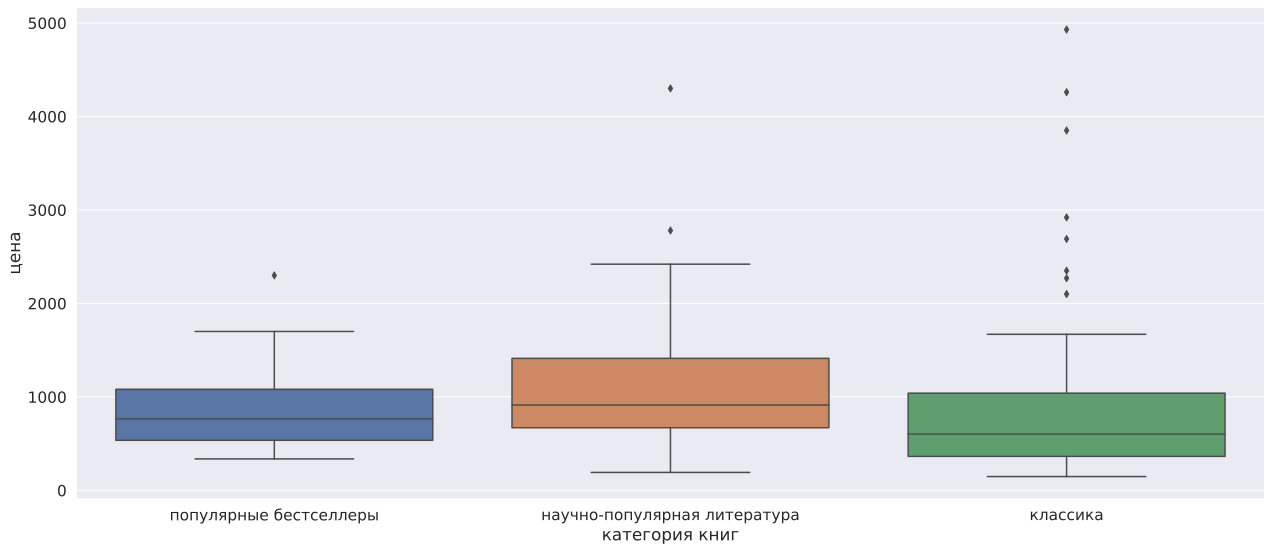

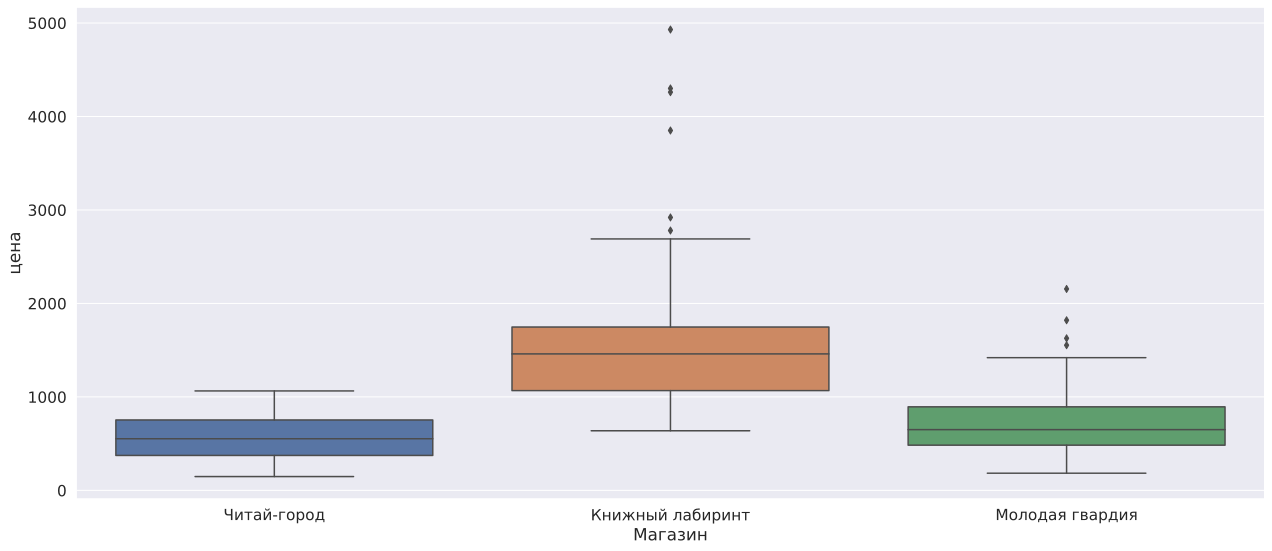

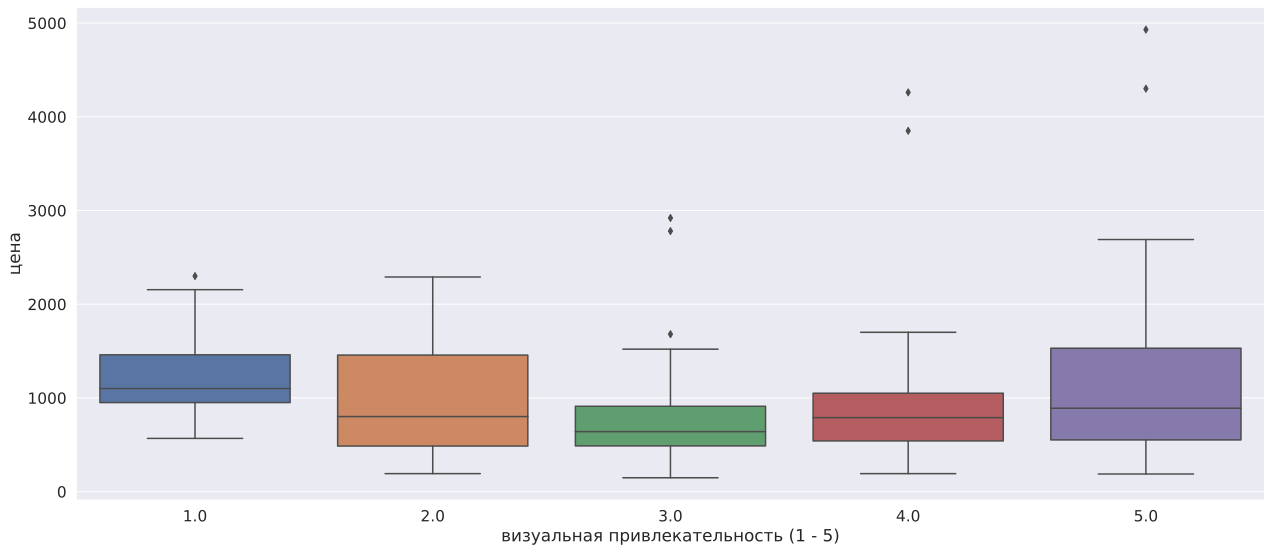

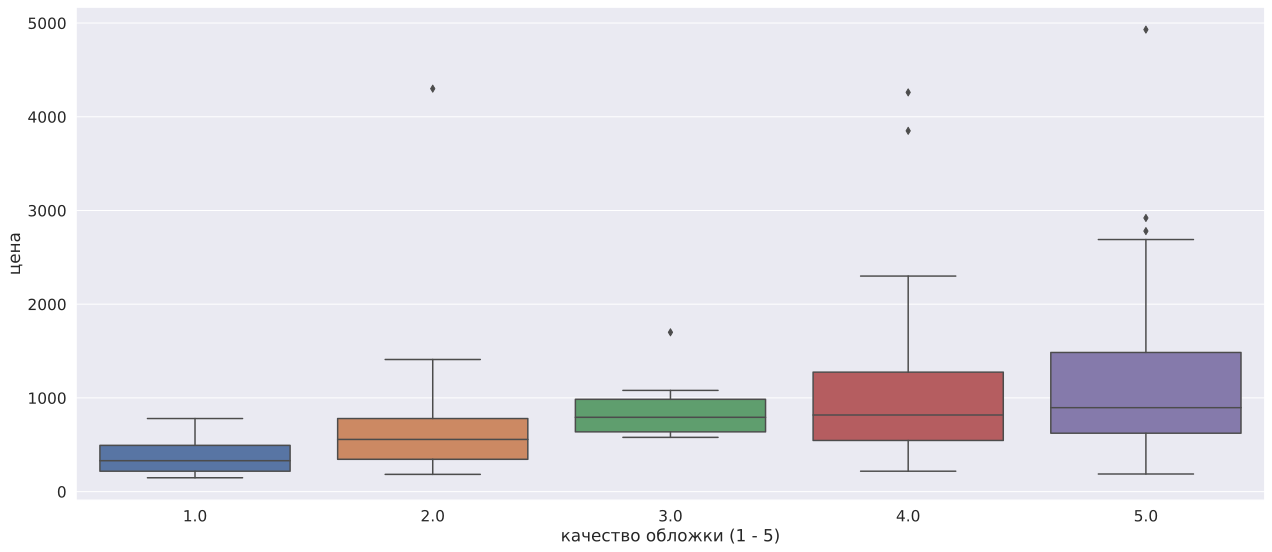

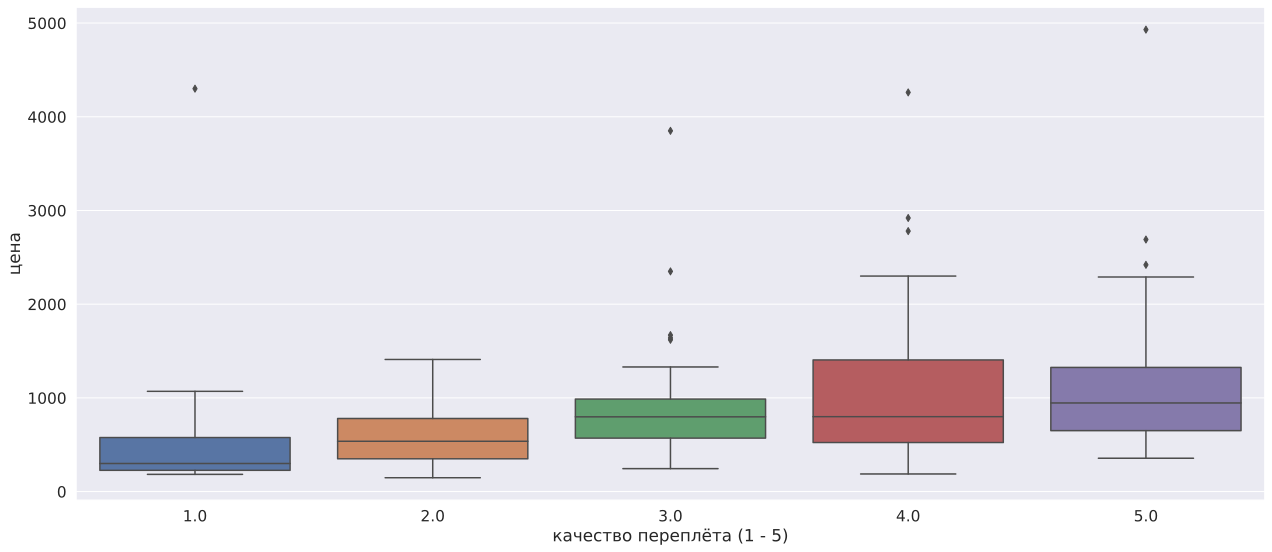

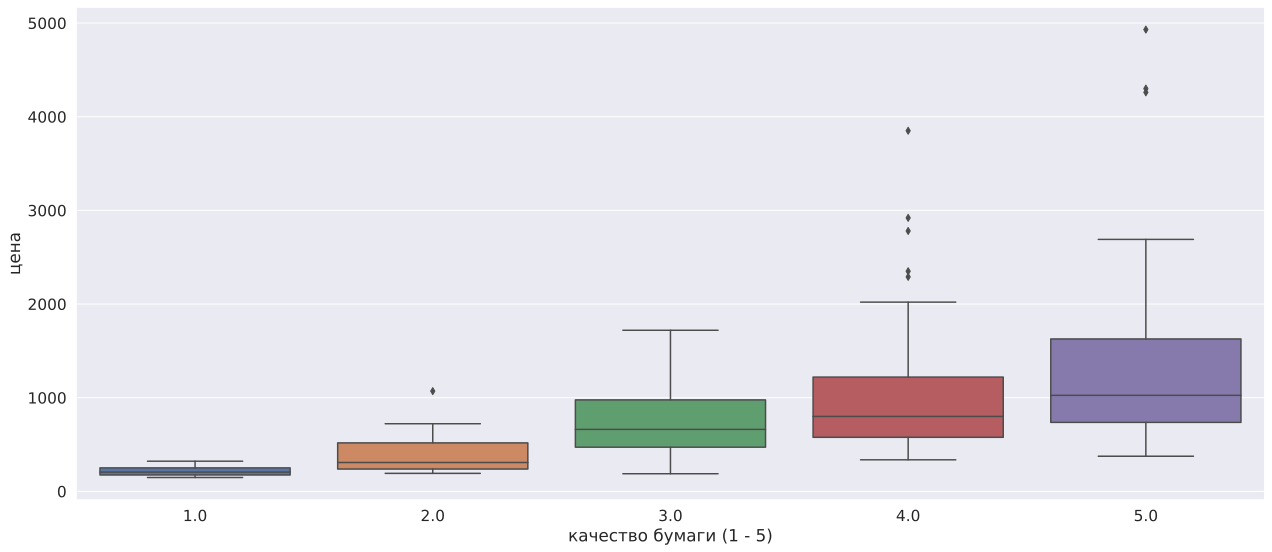

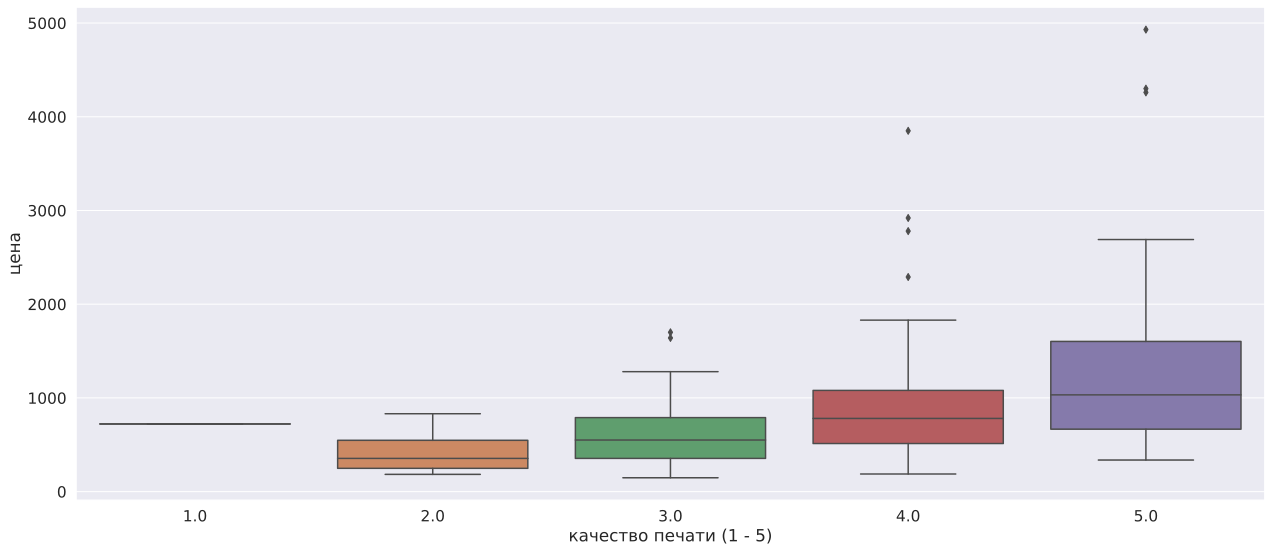

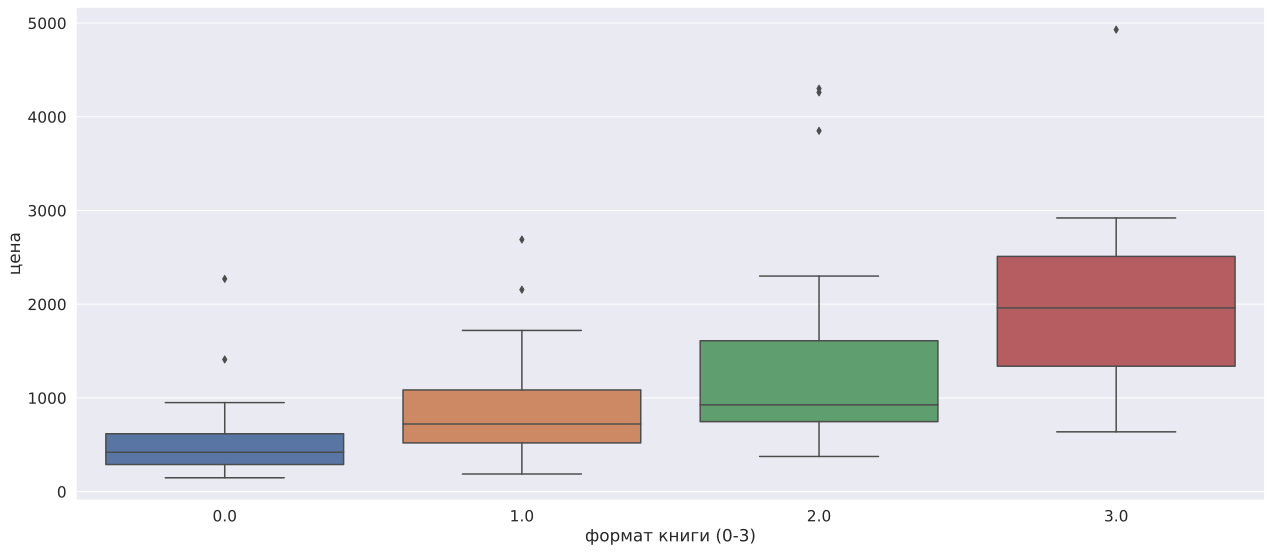

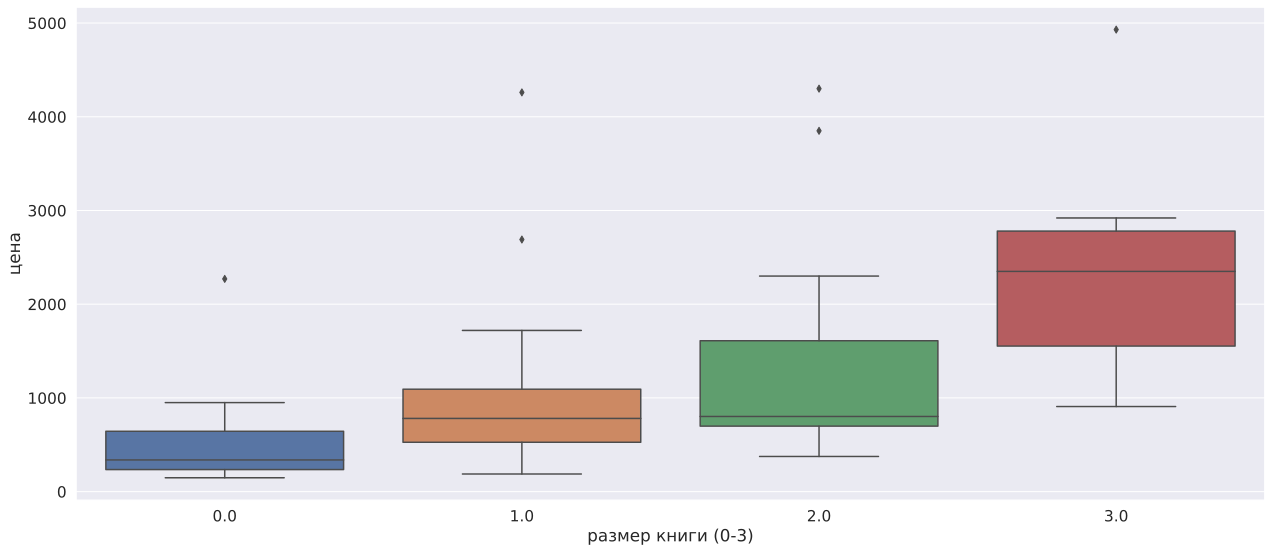

In [ ]:
for col in cols:
    sb.set(font_scale=1.4) # font size 2
    plt.figure(figsize=(18, 8))
    sb.boxplot(x=col, y="цена", data=main_df2)

    plt.savefig(f"price/{col}_цена", bbox_inches='tight', dpi=DPI_VALUE)
    plt.tight_layout()

In [ ]:
!zip -q price.zip price

<h1>ГИПОТЕЗА ДОМИНИРОВАНИЯ</h1>

In [ ]:
categories = ['Читай-город', 'Книжный лабиринт', 'Молодая гвардия']
category = 'Магазин'
cat = 'Читай-город'
data0 = get_data01(category, categories[0])
data1 = get_data01(category, categories[1])
data2 = get_data01(category, categories[2])

In [ ]:
data0.shape, data1.shape, data2.shape

((60,), (60,), (60,))

In [ ]:
stats.mannwhitneyu(data0, data1, alternative='greater')

MannwhitneyuResult(statistic=114.0, pvalue=1.0)

In [ ]:
stats.mannwhitneyu(data2, data1, alternative='greater')

MannwhitneyuResult(statistic=351.5, pvalue=0.9999999999999858)

In [ ]:
stats.mannwhitneyu(data0, data2, alternative='greater')

MannwhitneyuResult(statistic=1492.5, pvalue=0.9470186268031403)

In [ ]:
categories0 = ['Читай-город', 'Книжный лабиринт', 'Молодая гвардия']
categories1 = ['популярные бестселлеры', 'научно-популярная литература', 'классика']

category0 = 'Магазин'
category1 = 'категория книг'
method = 'HHG'

for i in range(len(categories0)):
    for j in range(i + 1, len(categories0)):
        print(f"Доминирование {categories0[i]} и {categories0[j]} на категориях книг в порядке {categories1}\n")
        for cat in categories1:
            print(cat)
            data0 = get_data10(category0, categories0[i], category1, cat)
            data1 = get_data10(category0, categories0[j], category1, cat)
            print(stats.mannwhitneyu(data0, data1, alternative='greater'))
            print()
        print()

Доминирование Читай-город и Книжный лабиринт на категориях книг в порядке ['популярные бестселлеры', 'научно-популярная литература', 'классика']

популярные бестселлеры
MannwhitneyuResult(statistic=9.0, pvalue=0.9999998892561375)

научно-популярная литература
MannwhitneyuResult(statistic=58.0, pvalue=0.9999420494292661)

классика
MannwhitneyuResult(statistic=1.0, pvalue=0.9999999660219243)


Доминирование Читай-город и Молодая гвардия на категориях книг в порядке ['популярные бестселлеры', 'научно-популярная литература', 'классика']

популярные бестселлеры
MannwhitneyuResult(statistic=196.0, pvalue=0.5484417520052178)

научно-популярная литература
MannwhitneyuResult(statistic=144.0, pvalue=0.9367846913166159)

классика
MannwhitneyuResult(statistic=163.0, pvalue=0.8447988719269208)


Доминирование Книжный лабиринт и Молодая гвардия на категориях книг в порядке ['популярные бестселлеры', 'научно-популярная литература', 'классика']

популярные бестселлеры
MannwhitneyuResult(statistic=382.

In [ ]:
categories0 = ['Читай-город', 'Книжный лабиринт', 'Молодая гвардия']
categories1 = ['популярные бестселлеры', 'научно-популярная литература', 'классика']

category0 = 'Магазин'
category1 = 'категория книг'
method = 'HHG'

for i in range(len(categories0)):
    for j in range(i + 1, len(categories0)):
        print(f"Доминирование {categories0[i]} и {categories0[j]} на категориях книг в порядке {categories1}\n")
        for cat in categories1:
            print(cat)
            data0 = get_data11(category0, categories0[i], category1, cat)
            data1 = get_data11(category0, categories0[j], category1, cat)
            print(stats.mannwhitneyu(data0, data1, alternative='greater'))
            print()
        print()

Доминирование Читай-город и Книжный лабиринт на категориях книг в порядке ['популярные бестселлеры', 'научно-популярная литература', 'классика']

популярные бестселлеры
MannwhitneyuResult(statistic=8.0, pvalue=0.9999999046179009)

научно-популярная литература
MannwhitneyuResult(statistic=26.0, pvalue=0.9999988234518901)

классика
MannwhitneyuResult(statistic=6.0, pvalue=0.9999999288405959)


Доминирование Читай-город и Молодая гвардия на категориях книг в порядке ['популярные бестселлеры', 'научно-популярная литература', 'классика']

популярные бестселлеры
MannwhitneyuResult(statistic=181.0, pvalue=0.7010858951467221)

научно-популярная литература
MannwhitneyuResult(statistic=117.5, pvalue=0.9876277421537373)

классика
MannwhitneyuResult(statistic=182.0, pvalue=0.6916209154555859)


Доминирование Книжный лабиринт и Молодая гвардия на категориях книг в порядке ['популярные бестселлеры', 'научно-популярная литература', 'классика']

популярные бестселлеры
MannwhitneyuResult(statistic=392.

In [ ]:
!ls >> price.txt